# DESCRIPTION

If you would like to skip right to data preparation without going through how all the underlying functions, please skip section two.

This is a notebook that currently consists of 2 sections:
1. **Functions**: Although unconventional in a Jupyter notebook, a preprocessing library were coded and explained in this section. Because the notebook style provides a clear overview of what has been done, this was intended for allowing an easier look under the hood when tuning or debugging of functinos were needed. Having said that, this section is now converted into an external library and can be found at https://github.com/clokman/DMT/tree/master/preprocessor.
2. **Data preparation**: Formatting and preprocessing of datasets in the project. 


# LIST OF CONTENTS
  
Functions (Preprocessor Package)
1. [Functions and testing them on demo data](#functions) 

Data Preparation
1. [Intake data](#intake-data) 
2. [Daily data](#daily-data) 
3. [Fitbit data](#fitbit-data)
4. [Final steps](#final-steps) 

## On Jupyter Usage
**IMPORTANT, please read before beginning.**

**Common error #1**:<br>
"name VARIBABLE_NAME is not defined. If a cell does not run properly, this is probably due it being dependent on a previous cell, and that previous cell has not been ran by Jupyter kernel yet. In such cases, it is recommended to run all previous cells first, and then trying to run the cell again.

**Common error #2**:<br>
Something is strange is going on; everything looks right, but it doesn't work. This may be due cells being ran in wrong order. For instance, if you had went back and ran a cell, it may have overwritten a variable that a cell at the end of the notebook may be working with (although the variable names are usually distinct in sections, this could still be an issue within sections). Once again, it is recommended to run all previous cells first (in the right order), and then trying to run the cell again.

**How to run all necessary cells in order to satisfy dependencies between them**:<br>
- All cells up until the selected cell can be ran by going to "Cell -> Run all above".
- Multiple cells can also be selected and can be ran at the same time by using the appropriate multiple selection hotkey and then the "Run" hotkey (see shortcuts section from Help menu).
- Finally, is something seems quite wrong, the best option could be to go to "Menu -> Kernel -> Restart and Run All" -- This is generally useful, but does not always produce the right result. 
- And sometimes the best solution may be to run all the necessary cells manually in a sequential manner.


**How to use functions?**
I am doing my best to document them as concisely as possilbe. While in the edit mode, **'TAB' key completes function and variable names, and pressing SHIFT+TAB while cursor is 'within' a function shows docstrings (i.e., quick documentation)**. Pressing SHIFT+TAB 2 times will show more a mor detailed tooltip. With these two shortcuts, it should be quite easy to use the homebrewed functions in this notebook without having to go to their source code to understand them. 

# META

TODO:
- Use classes: Convert functions to methods.
- Bug: append_column function only works properly for unique variable names/unique variable lists. If either is entered more than once, it adds header row as a value.

<a name="functions"></a>
# PART I: FUNCTIONS (PREPROCESSOR PACKAGE)

In this section, a Python package for data manipulation and preprocessing, "Preprocessor" is created. Preprocessor package allows datasets to be stored as nested lists and contains various dataset modification functions. Due to its list-based approach, it offers an alternative approach to numpy. <font color=red> As of June 2017, this package is no more updated on this notebook, and its latest version can be found at:</font> https://github.com/clokman/DMT/tree/master/preprocessor 

# Import demo data

This demo dataset will be used for debugging the functions in this section.

In [336]:
import csv
demo_data = list(csv.reader(open("data//original_data//intake-vragenlijst-v2.csv", encoding="utf8"), delimiter=";"))

# Split headers and data 
**get_headers | get_data**

For the set of functions in this project, it is desirable to NOT separate headers row from data. This is taken care of within functions by using the following functions.  

In [337]:
def get_headers(dataset):
    return(dataset[0])

def get_data(dataset):
    return(dataset[1:len(dataset)])

# Replace headers
**replace_headers()**

Usage: <br>
replace_headers(NEW_HEADERS_LIST, DATASET)

Datasets usually come with automatically generated headers which needs to be replaced with proper ones. This function takes care of this.

In [338]:
def replace_headers(header_replacements, dataset):
    # Replace headers with those in the header_replacements list
    for i, header in enumerate(header_replacements): 
            dataset[0][i] = header

In [339]:
# This is a list taken from 'survey features.xlsx'        
replacements = ["date", "consent", "id", "sex", "age", "edu", "timezone_change", "sleep_disorder", "nightshift", "psy_disorder", "wake", "young_kids", "partn", "btptr_1", "btptr_2", "btptr_3", "btptr_4", "btptr_5", "btptr_6", "btptr_7", "btptr_8", "btptr_9", "ats_1", "atbr_1", "sq_1", "sq_2", "sq_3", "sq_4", "sq_5", "sq_6", "atbr_2", "atbr_3", "ats_2", "ats_3", "chron_1", "chron_2", "chron_3", "chron_4", "chron_5", "chron_6", "chron_7", "chron_8", "sc_1", "sc_2", "sc_3", "sc_4", "sc_5", "sc_6", "sc_7", "sc_8", "sc_9", "sc_10", "sc_11", "sc_12", "sc_13"]
replace_headers(header_replacements=replacements, dataset=demo_data)

In [340]:
print("demo_data headers row:\n" + str(demo_data[0]))
print("\ndemo_data:\n" + str(demo_data[1]) + "\n...")

demo_data headers row:
['date', 'consent', 'id', 'sex', 'age', 'edu', 'timezone_change', 'sleep_disorder', 'nightshift', 'psy_disorder', 'wake', 'young_kids', 'partn', 'btptr_1', 'btptr_2', 'btptr_3', 'btptr_4', 'btptr_5', 'btptr_6', 'btptr_7', 'btptr_8', 'btptr_9', 'ats_1', 'atbr_1', 'sq_1', 'sq_2', 'sq_3', 'sq_4', 'sq_5', 'sq_6', 'atbr_2', 'atbr_3', 'ats_2', 'ats_3', 'chron_1', 'chron_2', 'chron_3', 'chron_4', 'chron_5', 'chron_6', 'chron_7', 'chron_8', 'sc_1', 'sc_2', 'sc_3', 'sc_4', 'sc_5', 'sc_6', 'sc_7', 'sc_8', 'sc_9', 'sc_10', 'sc_11', 'sc_12', 'sc_13']

demo_data:
['2017/04/01 8:35:57 p.m. EET', 'Ja, ik neem deel', 'EM11', 'Vrouw', '44', 'HBO', 'Nee', 'Nee', 'Nee', 'Nee', 'Ja', 'Nee', 'Soms', 'soms', '(bijna) altijd', '(bijna) altijd', 'soms', '(bijna) nooit', 'soms', '(bijna) altijd', '(bijna) nooit', '(bijna) altijd', '(bijna) nooit', '(bijna) nooit', 'binnen een kwartier', 'nooit', 'nooit', 'nooit', 'een beetje', 'erg goed', '(bijna) nooit', '(bijna) nooit', 'vaak', '(bijna

# Selecting columns based on their header names

These functions requires data headers and data to be split beforehand.

## 1. Find column/index of a given header
**get_header_index()**

Usage:<br>
get_header_index(HEADER_NAME_STRING, DATASET)

First, a get_header_index function needs to be built in order to match header name to an index number in the data:

In [341]:
def get_header_index(header_query, dataset):
    headers = get_headers(dataset)
    # find index number of given keyword header_name in demo_data headers
    current_index = 0
    if header_query in headers:     # if the keyword is in headers list
        for header in headers:      # iterate over headers list
            if header != header_query:   # until the query is matched
                current_index += 1       # keep incrementing index counter
            else: 
                return current_index

In [342]:
get_header_index("edu", demo_data)

5

## 2. Select a column with its name 
**select_column()**

Usage:<br>
select_column(HEADER_NAME, DATASET)

- Now that the corresponding index position of a given header can be found in the data... 
- Columns can be selected (i.e., returned) by entring their header names.
- requires: get_header_index()

In [343]:
def select_column (header_query, dataset):
    headers = get_headers(dataset)
    data = get_data(dataset)
    
    if header_query not in headers: # if the queried keyword is not in the headers list, return error 
        print("ERROR: Header not found in dataset.\nError occured while processing header_query: "+ header_query)
        raise ValueError('String not found in headers. Please enter a different column name. (See console output for last processed input string.)')

    header_index = get_header_index(header_query, dataset)
    column = [row[header_index] for row in data]   # assign the column matching the current_index from headers list to a variable
    return column                 # return the column sans header

In [344]:
# Test the function:        
select_column("edu", demo_data)

['HBO', 'WO', 'WO', 'WO', 'WO', 'HBO', 'HBO', 'WO', 'WO', 'MBO', 'WO']

# Print a column line by line
**print_columns()**

In [345]:
def print_column_vertically(target_column_name, dataset):
    '''
    Prints each variable of a column to a new line in console.
    
    Parameters:
        target_column (str): Header of the column to be printed
        dataset            : dataset to column is in
    
    Returns:
        Strings printed to console
        
    Examples:
        print_column_vertically("date", long_data)
    
    '''
    selected_column = select_column(target_column_name, dataset)
    for i, value in enumerate(selected_column):
        print(value)

***Use case***:

In [346]:
long_data = [["date"], ['2017/03/30 12:20:57 AM UTC+0200'], ['2017/03/31 1:38:41 AM UTC+0200'], ['2017/04/01 12:00:27 AM UTC+0200'], ['2017/04/01 12:46:28 PM UTC+0200'], ['2017/04/02 9:02:20 PM UTC+0200'], ['2017/04/04 1:14:43 AM UTC+0200'], ['2017/04/05 2:53:39 AM UTC+0200'], ['2017/04/05 2:38:53 PM UTC+0200'], ['2017/04/07 4:07:06 AM UTC+0200'], ['2017/04/09 11:20:17 PM UTC+0200'], ['2017/04/10 12:40:08 PM UTC+0200']]
print(long_data)

[['date'], ['2017/03/30 12:20:57 AM UTC+0200'], ['2017/03/31 1:38:41 AM UTC+0200'], ['2017/04/01 12:00:27 AM UTC+0200'], ['2017/04/01 12:46:28 PM UTC+0200'], ['2017/04/02 9:02:20 PM UTC+0200'], ['2017/04/04 1:14:43 AM UTC+0200'], ['2017/04/05 2:53:39 AM UTC+0200'], ['2017/04/05 2:38:53 PM UTC+0200'], ['2017/04/07 4:07:06 AM UTC+0200'], ['2017/04/09 11:20:17 PM UTC+0200'], ['2017/04/10 12:40:08 PM UTC+0200']]


The output above is too hard to read. Line by line printing is necessary:

In [347]:
print_column_vertically("date", long_data)

2017/03/30 12:20:57 AM UTC+0200
2017/03/31 1:38:41 AM UTC+0200
2017/04/01 12:00:27 AM UTC+0200
2017/04/01 12:46:28 PM UTC+0200
2017/04/02 9:02:20 PM UTC+0200
2017/04/04 1:14:43 AM UTC+0200
2017/04/05 2:53:39 AM UTC+0200
2017/04/05 2:38:53 PM UTC+0200
2017/04/07 4:07:06 AM UTC+0200
2017/04/09 11:20:17 PM UTC+0200
2017/04/10 12:40:08 PM UTC+0200


# Print multiple columns
**print_columns()**

A function to print values of multiple columns based on their names. Useful for testing and debugging.

Usage:<br>
print_columns(COLUMN_NAMES_LIST, DATASET)

In [348]:
def print_columns(column_names, dataset):
    '''
    Prints columns with specified column names in a dataset.
    
    Parameters:
        column_names: A list of strings or string of header name(s) in a column.
        dataset: The dataset variable. It must be already read, and must contain headers.  
    
    Returns:
        Prints strings to console line by line:
            __column_name1__ is: __column1_values__
            __column_name2__ is: __column2_values__
            
    Usage:
        print_columns(["day", "month"], sample_data)  # print multiple column names
        print_columns("day", sample_data)             # print a single column name 
    '''
    if type(column_names) is list:  # if the query is a list...
        for i, column_name in enumerate(column_names):
            print("\n" + column_name + " is: " + str(select_column(column_name, dataset)))            
    
    elif type(column_names) is str:  # if the query is a string (i.e., if a single column name is entered)...
        column_name = column_names
        print("\n" + column_name + " is: " + str(select_column(column_name, dataset)))
    
    else:  # if the query is not a list or single string, return error 
        raise ValueError('1: column_names must be a list of strings or a single string.')

In [349]:
sample_data = [['day', 'month'], ['1', 'June'], ['3', 'May'], ['4', 'Jun']]
print_columns(["day", "month"], sample_data)


day is: ['1', '3', '4']

month is: ['June', 'May', 'Jun']


In [350]:
print_columns("day", sample_data)


day is: ['1', '3', '4']


# Preview dataset in a compact format

In [351]:
def preview_data(dataset, depth=0):
    """
    Transposes and prints data for easy previewing.
    
    Usage:
        function(DATASET, DEPTH_int)

    Args:
        DATASET: This is a database that contains headers. The database must have already been tokenized and to a variable.
        DEPTH: The number of rows to print. (Rows will appear as lines next to column names in the transposed output).

    Returns:
        A line-by-line print of columns in a table. This is a transposed version of the table.

    Errors:
        01: User likely entered integer, string, or boolean instead of dataset.  
        
    Examples:
        preview_data(my_dataset)
        preview_data(my_dataset, 5) # displays all columns 5 rows deep

        > output
    """
    # Check if input is a dataset
    if type(dataset) is str or type(dataset) is int or type(dataset) is bool:
        raise ValueError("01: Argument 1 must be a dataset.")
    
    # Import regex module for later use in function
    import re
    
    # If the number of rows to be displayed is not specified, set it to display all rows. 
    if depth == 0:
        depth = len(dataset)
    
    # Select the number of rows sepecified by user 
    selected_rows   = dataset[0:depth]
    column_headers  = dataset[0]
    
    # Store each column in a list item
    extracted_columns = []
    for header in column_headers:
        extracted_columns.append(select_column(header, dataset))
        
    #Title and subtitle
    print("Transposed Table (Columns in original data => Rows in output)")
    print("Displaying up to " + str(depth) + " values per column.")
    print("=============================================================\n")
    
    # Print selected columns line by line, and clear unnecessary characters
    for i, column in enumerate(extracted_columns):
        output = str(column_headers[i]) + ": " + str(column[0:depth])
        output = re.sub("[\[\],]", "", output)
        print(output)

# Display frequencies of values in a column

In [352]:
def column_summary(column_name ,dataset, print_values=False):
    '''    
    Return (or print) the number of occurences for each value in the specified column in a dataset.
    
    Parameters:
        column_name (str)   : Target column name from the dateset headers.
        dataset     (var)   : Variable that holds the dataset. Headers must be included.
        print_values (bool) : Specifies whether to return or print variables
    
    Returns:
        If print_values == False (default) --> A dictionary object
        If print_values == True            --> *Line by line* output to console (and no dictionary object returns) 
    
    Examples:
        my_data = [["id", "number"],["John", 0], ["John", 12], ["Someone else", 7]]
        column_summary(column_name="id", dataset=my_data, print_values=True)
        > John
        > Someone else
    '''    
    column_summaries = {}
    selected_column = select_column(column_name, dataset)

    for value in selected_column:
        if value not in column_summaries:
            column_summaries[value] = 1
        else:
            column_summaries[value] += 1
    
    if print_values == True:
        for value in column_summaries:
            print(value)
    else:
        return(column_summaries)

Usage:

In [353]:
my_data = [["id", "number"],["John", 0], ["John", 12], ["Someone else", 7]]
column_summary(column_name="id", dataset=my_data, print_values=True)

John
Someone else


# Replacing columns
**replace_column()**

Usage:<br>
replace_column(REPLACEMENT_COLUMN_VALUES_LIST, TARGET_COLUMN_HEADER_STRING, DATASET)

- Mostly for internal use. Use translate_values() instead for a more useful version for value replacements.
- Function to replace values in a column in a dataset. Useful when re-writing a column after converting it to something else. (For instance, after converting likert scale responses from strings to integers).


In [354]:
def replace_column(replacement_column, target_column_header, dataset):
    data = get_data(dataset)

    target_index = get_header_index(target_column_header, dataset)
    for i, row in enumerate(data):
        row[target_index] = replacement_column[i]
    return data

Examples:

In [355]:
sample_data = [['day', 'month'], ['1', 'June'], ['3', 'May'], ['4', 'Jun']]
replacement_column = [10,20,30]

new_data = replace_column(replacement_column, "day", sample_data)
print(new_data)

[[10, 'June'], [20, 'May'], [30, 'Jun']]


# Value Transformations

## Transform values in columns to custom values
**transform_column_values()**



Usage:<br>
replace values(REPLACEMENTS_DICTIONARY, DATASET)

In [356]:
def transform_column_values(target_replacement_dictionary, target_column_headers_list, dataset):
    '''
    Replaces values in columns by using a dictionary of conversions (e.g., in order to quantify likert scales).
    
    Parameters:
        target_replacement_dictionary (dict) : A dictionary in which *keys* are old (target) values ...
                                             : ... and dictionary *values* are new (replacement) values.
        target_column_headers_list    (str)  : A list of headers as a list of strings, which specifies in which columns ...
                                             : ... the transformation will occur.
        dataset                       (var)  : A variable that holds the dataset. Headers must be included.
        
    Returns:
        Transformed the original dataset, and also returns it.
        Assignment of output to a variable is not necessary; inputted dataset will be changed without assignment as well.
        
    Examples:
        transform_column_values(replacements_dictionary, ["sc_9", "sc_10"], demo_data)
        transform_column_values({"yes":1, "no":2}, "consent", demo_data)
    '''
    
    # If target_column_headers_list is not a list but a string (i.e., target is a single column)...
    # Convert this string to a single list item so that the upcoming lines in the function can still take it as input.
    if type(target_column_headers_list) is str:                    # If parameter is string
        target_column_headers_list = [target_column_headers_list]  # Convert it to a list
    
    # Separate headers from data
    headers_list = get_headers(dataset)
    data = get_data(dataset)
    
    # Separate the dictionary to targets and replacements
    targets_list = []
    replacements_list = []
    for i, key in enumerate(target_replacement_dictionary):          # iterate over each item in the input dictionary
        targets_list.append(key)                                     # add keys to targets list
        replacements_list.append(target_replacement_dictionary[key]) # add values to replacements list
    
    # Extract values of the specified column in the given dataset by using a separate headers variable
    columns = {}
    for i, target_column_header in enumerate(target_column_headers_list):
        columns[target_column_header] = select_column(target_column_header, dataset) # and not 'data'; the headers in 'dataset' is necesary for the select_column() to work.
    
    # Search targets in each of the extracted columns, and when the target values are found, replace them with their counterparts specifie in the dictionary. 
    for column in columns:
        for i, target in enumerate(targets_list):
            for j, value in enumerate(columns[column]):
                if value == target:
                    columns[column][j] = replacements_list[i]
    
    # Replace columns within a copy of the provided dataset and return this dataset
    for col_name, col_values in columns.items():       
        replace_column(col_values, col_name, dataset) # and not 'data' but 'dataset', which includes headers
    
    return(dataset) # and not 'data' but 'dataset', which includes headers

### Examples:

List of target columns as input:

In [357]:
print("Original data:")
print_columns(["sc_9", "sc_10"], demo_data)

replacements_dictionary = {"oneens":1, "eens":2, "even vaak eens als oneens":3, "helemaal oneens":4, "x":5}
transform_column_values(replacements_dictionary, ["sc_9", "sc_10"], demo_data)

print("\nTransformed data:")
print_columns(["sc_9", "sc_10"], demo_data)

Original data:

sc_9 is: ['oneens', 'even vaak eens als oneens', 'eens', 'eens', 'oneens', 'oneens', 'even vaak eens als oneens', 'eens', 'helemaal oneens', 'oneens', 'eens']

sc_10 is: ['eens', 'eens', 'even vaak eens als oneens', 'oneens', 'oneens', 'eens', 'oneens', 'eens', 'oneens', 'oneens', 'even vaak eens als oneens']

Transformed data:

sc_9 is: [1, 3, 2, 2, 1, 1, 3, 2, 4, 1, 2]

sc_10 is: [2, 2, 3, 1, 1, 2, 1, 2, 1, 1, 3]


Single column as input:

In [358]:
print("Original data:")
print_columns("sc_11", demo_data)

transform_column_values(replacements_dictionary, "sc_11", demo_data)

print("\nTransformed data:")
print_columns("sc_11", demo_data)

Original data:

sc_11 is: ['even vaak eens als oneens', 'even vaak eens als oneens', 'oneens', 'eens', 'even vaak eens als oneens', 'eens', 'even vaak eens als oneens', 'oneens', 'eens', 'eens', 'even vaak eens als oneens']

Transformed data:

sc_11 is: [3, 3, 1, 2, 3, 2, 3, 1, 2, 2, 3]


## Transform specific parts of strings (substrings) in a column
**transform_column_substring()**

In [359]:
def transform_column_substring(target_substring, replacement_substring, target_headers_list, dataset):
    '''
    Replaces substring for all values in a column and returns the transformed dataset.
    Accepts regex as target_substring.
    
    Parameters:
        target_substring (str, regex)     : The old substring
        replacement_substring (str)       : The new substring
        target_headers_list   (str, list) : A list of he headers of the target columns. A single string value can also be inputted. 
        dataset                           : The variable that holds the dataset. Headers must be included in the dataset.
        
    Returns:
        The transformed dataset
        (Variable assignment is unnecessary, the original dataset is changed once the function is run)
    
    Examples:
        transform_column_substring("a.m.", "AM", "time", my_data)
        transform_column_substring("[Aa].[Mm].", "AM", "time", my_data)
                
        # Remove the dots from all values in the specified columns:
        transform_column_substring("\.", "", ["calories", "steps"], my_data)
    '''
    import re

    if type(target_headers_list) is str:           # If a single value is inputted as target column header (and not a list)
        target_headers_list = [target_headers_list]   # Convert this to a list with one item so the rest of the function can work correctly.
    
    for target_column_name in target_headers_list:                   # For each column in the inputted list
        selected_column = select_column(target_column_name, dataset) # Select the column
        for i, string in enumerate(selected_column):                 # And change the substring
            selected_column[i] = re.sub(target_substring, replacement_substring, string)

        replace_column(selected_column, target_column_name, dataset) # Rewrite the column with its new version

    return dataset

***Example:***

In [360]:
my_data = [ ["id", "time"], ["1", "10 a.m."], ["2", "8 a.m."], ["3", "4 A.M."] ]

print(my_data)

transform_column_substring("a.m.", "AM", "time", my_data)
print(my_data)

transform_column_substring("[Aa].[Mm].", "AM", ["time"], my_data)
print(my_data)

[['id', 'time'], ['1', '10 a.m.'], ['2', '8 a.m.'], ['3', '4 A.M.']]
[['id', 'time'], ['1', '10 AM'], ['2', '8 AM'], ['3', '4 A.M.']]
[['id', 'time'], ['1', '10 AM'], ['2', '8 AM'], ['3', '4 AM']]


In [361]:
my_data = [ 
    # These values are clearly wrong: Dots should not be there, as such small values do not make sense in this context.
    ["calories", "steps"], 
    ["1.242",    "12.32"], 
    ["2.300",    "21.10"], 
    ["500",      "1.20"] ]
print(my_data)

# Remove the dots from all values in the specified columns.
transform_column_substring("\.", "", ["calories", "steps"], my_data)
print(my_data)

[['calories', 'steps'], ['1.242', '12.32'], ['2.300', '21.10'], ['500', '1.20']]
[['calories', 'steps'], ['1242', '1232'], ['2300', '2110'], ['500', '120']]


## Transform strings in a column to integers or floats (where possible)
**transform_column_type()**

Import data, tokenize it, and read it to a variable:

In [362]:
def transform_column_type(target_headers, target_type, dataset):
    '''
    Transforms a column of string integers or floats to integers or floats.
    
    Parameters:
        target_headers    : Header(s) of the columns to transformed to integers. 
                            Can be a list of strings (for multiple columns) or a single string (for a single column).
        target_type (str)
            "int"         : Converts all values in the selected columns from strings to integers.
            "float"       : Converts strings to float values. 
        
        dataset           : A dataset that is read to a variable. It must contain headers.
    
    Returns:
        Transformed dataset
        Note: If function is run without any variable assignment, it still changes the original dataset variable. 
    
    Usage:
        transform_column_type("numbers_column", "int", my_data)
        transform_column_type(["small_numbers", "large_numbers"], "float", my_data)
    '''
    try:
        if type(target_headers) is str:
            target_headers = [target_headers]
        
        for header_name in target_headers:
            selected_column = select_column(header_name, dataset)
            if target_type is "int":
                selected_column = [ int(value) for value in selected_column ]
            elif target_type is "float":
                selected_column = [ float(value) for value in selected_column ]
            replace_column(selected_column, header_name, dataset)
    except:
        raise ValueError("Unable to transform column values to target type. Column values are not strings that are convertible to target type?")
        
    return(dataset)

***Usage: Transform single column to integers***:

In [363]:
my_data = [["letters", "numbers"], ["a", "1"], ["b", "2"], ["c","3"]] # <- Notice the number strings 
transform_column_type("numbers", "int", my_data)

[['letters', 'numbers'], ['a', 1], ['b', 2], ['c', 3]]

***Usage: Transform multiple columns to integers***:

In [364]:
my_data = [["letters", "small numbers", "large numbers"], ["a", "1", "100"], ["b", "2", "200"], ["c","3", "300"]]

In [365]:
my_data = [["letters", "small numbers", "large numbers"], ["a", "1", "100"], ["b", "2", "200"], ["c","3", "300"]]
transform_column_type(["small numbers", "large numbers"], "int", my_data)

[['letters', 'small numbers', 'large numbers'],
 ['a', 1, 100],
 ['b', 2, 200],
 ['c', 3, 300]]

***Variable assignment***:
- The function changes the dataset by default.
- If it is assigned to a variable, it would do that AND also assign the new dataset to a new variable. This is most likely not necessary.

In [366]:
my_data = [["letters", "numbers"], ["a", "1"], ["b", "2"], ["c","3"]] # <- Notice the number strings 
x = transform_column_type("numbers", "int", my_data)
print (x)

[['letters', 'numbers'], ['a', 1], ['b', 2], ['c', 3]]


## Missing Value Transformations

### Return Column with Missing Values Replaced with Query

In [367]:
def missingval_return_replaced(missing_value_query, replacement_value, target_column_header, dataset):
    '''
    Returns the inputted column with a version of itself that has its missing values replaced with the given value.
    NaN values will be replaced no matter which missing_value_query is entered, so in such caes, it can also be just 
    an empty string (i.e., "").
    '''
    selected_column = select_column(target_column_header, dataset)
    
    for i, each_row in enumerate(selected_column):
        # If row is a missing value or a NaN value (NaN values are never equal to themselves), replace it.
        if each_row == missing_value_query or each_row != each_row:
            selected_column[i] = replacement_value
    return selected_column

### Return Column Without Missing Values 

In [368]:
def missingval_return_without(missing_value_query, target_column_header, dataset):
    '''
    Returns the inputted column with a version of itself that has its missing values removed. 
    It should be noted that this new column will be shorter after removal of missing values. 
    
    If the missing value is NaN (and  not 'NaN'), missing_value_query can take any value (e.g., """), and the function 
    will still return without NaN values.
    '''
    selected_column = select_column(target_column_header, dataset)
    
    transformed_column = []
    for i, each_row in enumerate(selected_column):
        # If row is not a missing value or a NaN value (NaN values are never equal to themselves), append it to new column
        if each_row != missing_value_query and each_row == each_row:
            transformed_column.append(selected_column[i]) # append it to the new list
    return transformed_column

## Parse times given in hh:mm format
**parse_hour_minute()**

In [369]:
def parse_hour_minute(target_columns_list, ymd_column_name, dataset):
    """
    Transforms string object in hh:mm format to a datetime.datetime object.
    
    Parameters:
        target_columns_list (lst): A list of strings containing the headers of target columns.      
        ymd_column_name     (str): The column that holds the year, month, and date information as a 'datetime' object.
        dataset             (var): The variable that the dataset is stored in. Headers of the dataset must be
                                   included in the dataset variable.
        
    Returns:
        Rewrites the inputted dataset.
        (Variable assignment is not necessary.)
    
    Errors:
        [Error 1] Because this function transforms it input variable ("i.e., dataset") into an object it cannot process
            (i.e., string --> datetime format), it cannot be run twice consequently.
    
    Examples:
        parse_hour_minute([time1, time2], my_dataset)
    """
    
    for column_name in target_columns_list:
        if type(column_name) is not str:
            raise ValueError("[Error 1] Non-string header name is found in target headers list. Please check your headers.")
    
    import datetime
    import pandas # Necessary for creating NaT (Not a time) values.
    
    for column_name in target_columns_list:                    # for each column

        selected_column = select_column(column_name, dataset)  
        
        for i, time in enumerate(selected_column):              # and for each value in each of these columns
            try:
                dates = select_column(ymd_column_name, dataset)
                time_full = (str(dates[i].year) + "." + str(dates[i].month) + "." + str(dates[i].day) + " " + str(time))

                selected_column[i] = datetime.datetime.strptime(time_full, "%Y.%m.%d %H:%M")
            except:                         # If time cannot be converted (e.g., because it's a "NA" value)...
                selected_column[i] = pandas.NaT   # Just copy-paste the problematic value (e.g., a NA value) in the new column
        replace_column(selected_column, column_name, dataset)

# Append column to dataset
**append_column()**

Usage:<br>
- append_column(NEW_COLUMN_VARIABLES_LIST, NEW_COLUMN_NAME_STRING, DATASET)
- Changes the inputted dataset when ran (no need for assigning the output to a variable).

In [370]:
def append_column (new_column_values, new_column_name, dataset):
    # Check for duplicate header names
    headers = get_headers(dataset)
    if new_column_name in headers:  # if this duplicate check is not included, things go wrong (the duplicate header gets added to column values—a strange behavior, but it is prevented with not allowing duplicate headers). 
        print("ERROR: Header name already in dataset. Re-run all code up to this point or change header name.\nError occured while processing new_column_name: " + str(new_column_name))
        raise ValueError("Header name already in dataset. Please choose a different name. If name is correct, try re-running all code up to this point. (See console output for last header name processed.)")
    
    # Append the inputted column to specified dataset   
    new_column = new_column_values           # pass argument to variable
    new_column.insert(0, new_column_name)    # new column = merging of column name and column values
    for i, row in enumerate(dataset):        # for each row in the dataset...
        row.append(new_column[i])            # ...append the new column at the end (original dataset is already changed with this line, and there is no additional action [e.g., variable re-assignment] needed to change the dataset). 
    return dataset                           # output the changed dataset

In [371]:
sample_data  = [['day', 'month'], ['1', 'June'], ['3', 'May'], ['4', 'Jun']]
years_column = [2149,2150,2151]

append_column(years_column, "year", sample_data)
print(sample_data) # changes the original data set without a need to assign the output to a new variable, etc.

[['day', 'month', 'year'], ['1', 'June', 2149], ['3', 'May', 2150], ['4', 'Jun', 2151]]


# Calculate scale scores 
**calculate_scores()**

Usage:
calculate_scores(STRING_LIST_OF_QUESTION_NAMES, DATASET)

- This function calculates the row sums for given columns, which can be used to calculate scale/questionnaire scores.

- It works by taking column names and dataset as input, and returning a list of integers which is the sum of each row of the given column names.

In [372]:
# TESTING VARIOUS POSSIBILITIES. THIS CELL IS NOT THE MAIN FUNCTION. 

columns = {"column1":[1,2,3], "column2":[10,20,30], "column3":[100,200,300]}

count_values = [3]
#count_values = None

#filter_values = [10, 2, 3]
filter_values = None

if count_values == None:
    count_values = [None]
elif type(count_values) != list:
    try:
        count_values = [count_values]
    except:
        raise ValueError("[2] 'count_values' parameter is not convertible to list.")

if filter_values == None:
    filter_values = [None]
elif type(filter_values) != list:
    try:
        filter_values = [filter_values]
    except:
        raise ValueError("[3] 'filter_values' parameter is not convertible to list.")

if count_values != [None]:
    for each_key, each_column in columns.items():
        for i, each_value in enumerate(each_column):
            if each_value not in count_values:
                print(each_value, count_values)
                columns[each_key][i]=0 
            else:
                columns[each_key][i]=1


if filter_values != [None]:
    for each_key, each_column in columns.items():
        for i, each_value in enumerate(each_column):
            if each_value not in filter_values:
                print(each_value, filter_values)
                columns[each_key][i]=0 

print(columns)

1 [3]
2 [3]
10 [3]
20 [3]
30 [3]
100 [3]
200 [3]
300 [3]
{'column1': [0, 0, 1], 'column2': [0, 0, 0], 'column3': [0, 0, 0]}


In [373]:
def calculate_scores(scale_columns_list, dataset, count_values=None, filter_values=None):
    """
    Args:
        QUESTION HEADERS: This must be a list of strings that hold the header names for target questions. 
        DATASET: The variable that holds the dataset to process.
        COUNT_VALUES (List of int or float, int, float): Counts the number of occurences for given values.
        FILTER_VALUES (List of int or float, int, float): Values to filter. All other values are be converted to 0. 
    
    Returns:
        A LIST of INTEGERS that holds the calculated scores.
    
    Raises:.
        ValueError: [1] All values in the target rows (except the headers) must be either integers or strings that are convertible to strings. 
    """
    #########################    
    ###  INITIALIZATION  ###
    #########################
    # Prepare count_values parameter for internal use
    if count_values == None:
        count_values = [None]
    elif type(count_values) != list:
        try:
            count_values = [count_values]
        except:
            raise ValueError("[2] 'count_values' parameter is not convertible to list.")

    # Prepare filter_values parameter for internal use
    if filter_values == None:
        filter_values = [None]
    elif type(filter_values) != list:
        try:
            filter_values = [filter_values]
        except:
            raise ValueError("[3] 'filter_values' parameter is not convertible to list.")

    ###############################    
    ###  DICTIONARY OF COLUMNS  ###
    ###############################
    # Make a dictionary of columns to be included in the score calculation (keys are column headers, values are column rows)
    columns = {}
    for column_name in scale_columns_list:
        current_column = select_column(column_name, dataset)
        for i, element in enumerate(current_column):
            try:
                current_column[i] = float(element) # For compatibility with NaN values, this must be float
            except:
                raise ValueError("[1] Scores are not integers or floats (or not strings that are convertible to float). A non-number string exists in the data?")        
                break
        columns[column_name] = current_column
 

    #########################    
    ###  TRANSFORMATIONS  ###
    #########################
    # Change all dictionary values that is given in count_values parameter to 1, and all others to 0
    if count_values != [None]:
        for each_key, each_column in columns.items():
            for i, each_value in enumerate(each_column):
                if each_value not in count_values:
                    columns[each_key][i]=0 
                else:
                    columns[each_key][i]=1

    # Keep all dictionary values that is given in the filter_values parameter, and make all other values 0
    if filter_values != [None]:
        for each_key, each_column in columns.items():
            for i, each_value in enumerate(each_column):
                if each_value not in filter_values:
                    columns[each_key][i]=0         
        
    ###################    
    ### CALCULATION ###
    ###################
    current_and_previous_column = [] # temporary variable necessary for column additions in the for loop below 
    sum_of_each_row_so_far = []      # will ultimately hold scores of each row                         
                                             
    for column_key, column_values in columns.items(): # For each column (which are now in the 'columns' dictionary)
        # To begin, add all values of the first row for all columns to 'sum_of_each_row_so_far'.
        # (At this point, the for loop's index = 0 (i.e., the first column/key in dictionary))
        
        if len(sum_of_each_row_so_far) == 0:             
            for value in column_values:
                sum_of_each_row_so_far.append(value)
        # (By the time the for loop reaches this 'else', index = 1 instead of 0 (i.e., the second key/column in dictionary)).
        else:
            current_and_previous_column = list(zip(sum_of_each_row_so_far, column_values)) # Pair values of the first rows of columns (stored in 'sum_of_each_row_so_far') and the values of the next row.
            for i, pair in enumerate(current_and_previous_column):
                sum_of_each_row_so_far[i] = sum(pair) # Sum the current row (index = 1) and the previous row (index  = 0)
                                      # After this calculation, let 'sum_of_each_row_so_far' become the result of this sum; 
                                      # And in the next iteration, use this sum as the input (i.e., the previous row) when adding the next row to it. 
    return sum_of_each_row_so_far

In [374]:
sample_data_2 = [
    ['participant_id', 'question_1', 'question_2', 'question_3'], 
    ['#1',             '0',           '-2',        '1'], # responses of participant 1
    ['#2',             '2',           '-3',        '0'], # responses of participant 2
    ['#3',             '4',           '-1',        '1'], # responses of participant 3
    ['#4',             '1',           '0',         '2']  # responses of participant 4
]

scores = calculate_scores(["question_1", "question_2", "question_3"], sample_data_2)
print("scores of four participants (row sums of given columns):" + str(scores))

scores = calculate_scores(["question_1", "question_2", "question_3"], sample_data_2, filter_values=[1])
print("filtered scores of four participants (filtered row sums of given columns):" + str(scores))

scores = calculate_scores(["question_1", "question_2", "question_3"], sample_data_2, count_values=[0,1])
print("counts of scores for four participants:" + str(scores))

scores of four participants (row sums of given columns):[-1.0, -1.0, 4.0, 3.0]
filtered scores of four participants (filtered row sums of given columns):[1.0, 0, 1.0, 1.0]
counts of scores for four participants:[2, 1, 1, 2]


# History Functions in Repeating-Row Datasets

- These functions can be used in datasets where groups of rows represent one subject. 
- For instance, in some datasets (e.g., daily data), one participant may occupy 20 rows, and then the next 20 rows would belong to the next participant.  

Example data (and its preparation) to use in this section:

In [375]:
# Minimized, one-line code
import csv; demo_daily_data = list(csv.reader(open("data//original_data//dagelijkse-vragenlijst-v3.csv", encoding="UTF8"), delimiter=";")); headers_list = ["date", "id", "bed_time", "late", "late_reason", "wake_time", "sleep_transition", "sleep_struggle", "night_wake", "wake_earlier", "wake_earlier_problem", "sleep_quality", "physical_activity", "mental_digital_activity", "social_activity", "light", "presleep_description", "temptation_smoking", "temptation_eating", "temptation_chat", "temptation_coffee", "temptation_social_media", "temptation_internet", "temptation_tv", "temptation_alcohol", "temptation_soft_drink", "temptation_cleaning", "temptation_shopping", "temptation_other", "bed_time_plan", "steps", "sun_hours"];replace_headers(headers_list, demo_daily_data); transform_column_substring(",", ".", "sun_hours", demo_daily_data); transform_column_type("steps", "int", demo_daily_data); transform_column_type("sun_hours", "float", demo_daily_data); print("")

## Divide rows in a column based on a grouping criteria (e.g., participant ID)

In [376]:
def divide_column_by_criteria(row_grouping_criteria_header, target_column_name, dataset, output="list"):
    '''
    Divides a column to multiple parts based on the division criteria provided (e.g., grouping rows based on participant ...
    IDs that are spread to multiple rows). Ignores capitalization differences in criteria names.
    
    Parameters:
        row_grouping_criteria_header (str): Header of the column that contains the criteria that will be used when creating groups 
                                            of rows (e.g., Participant ID)
        target_column_name    (str): The column that will be divided into groups
        dataset               (var): A variable containing a dataset with headers
        output                (arg): 
            "list" (default): turns on the list mode, which returns the output as a list that is in the same order with the 
                              inputted data (if the rows of the row grouping criteria column has no interruption [i.e., 
                              this shouldn't happen in data: 
                              participant A's id for 10 rows, and then participant B's id, and then participant A's again.])
            "dict"          : returns a dictionary instead of a list. Does not preserve order.
    
    Returns:
        A list of lists containing subgroups made out of the inputted column. 
    
    Examples:
       divided_column = divide_column_by_criteria("id", "procrastination_minutes", daily_data)

    '''
    # Compatibilty column for history_nback function. Can be ignored.
    if row_grouping_criteria_header is None:
        return [select_column(target_column_name, dataset)]
    
    
    # Initialize criteria that is going to be used to divide the columns, and initialize the target column to be divided 
    target_column   = select_column(target_column_name, dataset)
    criteria_column = select_column(row_grouping_criteria_header, dataset)
    

    
    # Make all elements in the criteria column (e.g., participant ids) lowecase, so instead of creating different groups for
    # ... each capitalization style of the criteria, one group is created. 
    for i, row in enumerate(criteria_column):
        criteria_column[i] = row.lower()

    # Reduce all items in the criteria column to their unique ocurences 
    criteria = set(criteria_column)
    
    # Divide the target column based on given criteria
    grouped_rows_dict = {}
    for criterion in criteria:
       
        grouped_rows_dict[criterion] = []
        
        counter = range(0,len(criteria_column))
        for i, criterion_value, target_value in zip(counter, criteria_column, target_column):
            if criterion_value == criterion:
                grouped_rows_dict[criterion].append(target_value)
    
    # Return a version of the inputted column that is divided per the criteria column
    if output == "list":
       # Order dictionary return order based on row order in the column
        divider_column = select_column(row_grouping_criteria_header, dataset)
        groups_order = []
        for criterion in criteria_column:
            if criterion not in groups_order:
                groups_order.append(criterion)
       
        grouped_rows_ordered_list = []
        #for group_key, group_values in grouped_rows_dict.items():
        #    for group_name in groups_order:
        #        if group_key is group_name:
        #            grouped_rows_ordered_list.append(grouped_rows_dict[group_key])
        
        for group_name in groups_order:
                for group_key, group_values in grouped_rows_dict.items():
                    if group_key is group_name:
                        grouped_rows_ordered_list.append(grouped_rows_dict[group_key])
              
        return grouped_rows_ordered_list
    elif output == "dict":
        return grouped_rows_dict

In [377]:
x = divide_column_by_criteria("id", "sun_hours", demo_daily_data)
y = divide_column_by_criteria("id", "sun_hours", demo_daily_data, "dict")

print(x)
print("")
print(y)
print("")
print_columns("id", demo_daily_data)

[[12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3], [12.3, 5.3, 8.6, 0.9, 7.7, 2.4, 4.7, 3.4, 7.4, 9.2, 7.1, 12.3, 0.4, 7.8, 5.5], [12.3, 5.3, 8.6, 0.9, 7.7, 2.4, 4.7, 3.4, 7.4, 9.2, 7.1, 12.3, 0.4, 7.8], [12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3], [12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0, 7.5, 7.9, 6.7], [12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4, 10.4, 8.1, 8.1], [12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4], [12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0, 7.5], [12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0], [12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4, 10.4, 8.1, 8.1]]

{'ab64': [12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3], 'gw98': [12.3, 6.2, 10

## Return a vector or column's values n values ago

In [378]:
def history_nback(target_column_name_or_target_var, n_back, input="list", dataset=None, row_grouping_criteria_header=None):
    '''
    Displays a vector's n-back element. Vector can be a column specified by its name in the parameters, 
    ... or it can be a vector that holds a vector.
    
    Parameters:
        target_column_name_or_target_var (str or var): A column specified by its name in the parameters, or a vector that holds a target vector.
        n_back(int): Number of elements to go back when selecting the previous value. 
        
        input (arg):
            "list" (default): Processes input as a vector that holds a list
            "column": Processes input as a vector that holds a dataset
        
        dataset (var): vector that holds that a dataset with headers. Must be provided if target is a column name.
                
        row_grouping_criteria_header: If a dataset is given, a row grouping criteria can also be defined. Can also be left blank.
        
    Returns:
        A list containing previous values of elements
        
    Examples:
        my_list = [1, 2, 3, 4, 7]
        my_list_one_back   = history_nback(my_list, 1)
        > [0, 1, 2, 3, 4]
        
        history_nback("value_column", 2, "column", dataset=my_data)
        history_nback("value_column", 2, "column", dataset=my_data, row_grouping_criteria_header="id")

    '''
    
    # If input is not a vector, select the specified column from the dataset. 
    if input is "column":
        vectors_list = divide_column_by_criteria(row_grouping_criteria_header, target_column_name_or_target_var, dataset)

    # If input is a vector, initialize internal vectors accordingly.
    elif input is "list":
        vectors_list = [target_column_name_or_target_var]
    
    vectors_list_with_nbacks   = []
    for each_vector in vectors_list:
        # Assign a x-back previous values of a column or vector to a new vector.
        current_nbacks = []
        for i, each_element in enumerate(each_vector):
            current_nbacks.append(each_vector[i-n_back])
        current_nbacks[0:n_back] = [float("NaN")]*n_back   # replace meaningless values with 0
        vectors_list_with_nbacks.append(current_nbacks)
    
    unified_vector_with_nbacks = []
    for each_vector in vectors_list_with_nbacks:
        unified_vector_with_nbacks.extend(each_vector)
    
    return(unified_vector_with_nbacks)

Use history_nback on a list:

In [379]:
my_list = [1, 2, 3, 4, 7]
my_list_one_back = history_nback(my_list, 1)
my_list_two_back = history_nback(my_list, 2)
my_list_three_back = history_nback(my_list, 3)

print(my_list_one_back)
print(my_list_two_back)
print(my_list_three_back)

[nan, 1, 2, 3, 4]
[nan, nan, 1, 2, 3]
[nan, nan, nan, 1, 2]


Use history_nback on a dataset:

In [380]:
my_data = [
    ["id", "value"], 
    ["john", 1], ["JOHN", 2], ["John", 3], ["john", 4],  # <-- Note the capitazliation deifferences (they are no problem)
    ["michael", -1], ["michael", -2], ["michael", -3], ["michael", -4], 
    ["james", 10], ["james", 11], ["james", 12], ["james", 13]
]

nback_all    = history_nback("value", 2, "column", dataset=my_data)
nback_per_id = history_nback("value", 2, "column", dataset=my_data, row_grouping_criteria_header="id")

print(nback_all)    # this is possibly the wrong usage if a dataset consists of multi-row cases. It is perfectly OK to
                    # ... use if the column does not contain multi-row cases. 
print(nback_per_id) # note that the n-back behavior is reset each time a row with a different id starts to be processed.

[nan, nan, 1, 2, 3, 4, -1, -2, -3, -4, 10, 11]
[nan, nan, 1, 2, nan, nan, -1, -2, nan, nan, 10, 11]


In [381]:
one_days_before   = history_nback("sun_hours", 1, input="column", dataset=demo_daily_data)
two_days_before   = history_nback("sun_hours", 2, "column"      , demo_daily_data) 
three_days_before = history_nback("sun_hours", 3, "column"      , demo_daily_data)

print_columns("sun_hours", demo_daily_data)

print("\nOne day before")
print(one_days_before)
print("\nTwo days before")
print(two_days_before)
print("\nThree days before")
print(three_days_before)


sun_hours is: [12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3, 12.3, 5.3, 8.6, 0.9, 7.7, 2.4, 4.7, 3.4, 7.4, 9.2, 7.1, 12.3, 0.4, 7.8, 5.5, 12.3, 5.3, 8.6, 0.9, 7.7, 2.4, 4.7, 3.4, 7.4, 9.2, 7.1, 12.3, 0.4, 7.8, 12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3, 12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0, 7.5, 7.9, 6.7, 12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4, 10.4, 8.1, 8.1, 12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4, 12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0, 7.5, 12.3, 6.2, 10.3, 0.9, 6.6, 4.8, 4.5, 2.9, 9.9, 10.2, 7.9, 11.5, 0.3, 6.8, 6.8, 1.9, 7.6, 8.0, 12.5, 1.9, 1.6, 0.1, 6.6, 0.6, 6.8, 8.6, 7.6, 6.3, 5.1, 9.8, 1.1, 6.9, 9.7, 2.4, 10.4, 8.1, 8.1]

One day before
[nan, 12.3, 8.8, 10.7, 1.3, 7.2, 4.4, 5.8, 5.3, 9.4, 9.0, 6.3, 12.5, 0.7, 6.3, 12.3, 5.3, 8.6, 0

## Return n-day cumulative history of a vector or column's values 

In [382]:
def history_cumulative(target_column_name, n_back, dataset, row_grouping_criteria_header=None, zero_floored_summation=0):
    '''
    Calculates the cumulative sums of past x days for each value in the inputted column. Optionally, 
    also takes a row grouping criteria (for instance, to calculate cumulative history of each participant id 
    within themselves).
    
    Parameters:
        target_column_name (str)  : The name of the header that needs to be targeted.
        
        n_back (int)   : Number of days to go back when calculating cumulative sums.
        
        dataset (var): A variable that contains a dataset with headers.
        
        row_grouping_criteria_header (str): The header of the column that will be used for grouping the multi-row variable in 
        the target column. When a grouping criteria header is provided, this simply divides the column into multiple lists 
        within a list. 
        
        zero_floored_summation(0,1): Performs the cumulative summation in a sequential manner, and sets a floor value for 
        calculation. Useful in cases where negative values are not possible (e.g., sleep deficit calculations).  
    
    Returns:
         A list containing integers or floats
    
    Examples:
        history_cumulative("value", 3, my_data, "id")
        sleep_debts = history_cumulative("value", 5, sleep_debt_changes, "id", zero_floored_summation=1)
    '''
    # Make an iterative summation function for calculating variables that cannot go below a certain value (e.g., sleep debt) 
    def sum_iterative(vector_to_iterate, floor_value=None):
        vector = vector_to_iterate

        vector_summed_so_far = 0
        current_sum = 0
        for i in range(1, len(vector)):
            if i == 1:
                current_sum = vector[i-1] + vector[i]
            elif i > 1:
                current_sum = vector_summed_so_far + vector[i] 
            if floor_value != None:
                if current_sum < floor_value:
                    current_sum = 0

            vector_summed_so_far = current_sum

        return(vector_summed_so_far)

    # Will give an error if row_grouping_criteria_header is None. Needs to be fixed.
    # Divide the given column with multi-row subjects to groups based on grouping criteria (e.g., id)
    grouped_rows_list = divide_column_by_criteria(row_grouping_criteria_header, target_column_name, dataset)
    
    cumulative_history_values_for_all_groups = []
    # For each group of values/rows in the current vector/column (rows are grouped by row_grouping_criteria_header) 
    for each_group in grouped_rows_list:

        # Create a dictionary that holds historical versions of the current group of rows/values in the current column
        historical_versions_of_current_group_init = {} # This dictionary has no proper key names yet, so its named _init
        for i in range(0,n_back):
            historical_versions_of_current_group_init[i] = history_nback(each_group, i)

        # If the value is NaN, replace it with 0. This is necessary for cumulative calculations up to n'th day, 
        # or first n values would be NaN (desirable for values n days ago, but not for cumulative history)  
        #for each_key, each_list in historical_versions_of_current_group_init.items():
        #    for i, each_item in enumerate(each_list):
        #        if each_item != each_item:
        #            historical_versions_of_current_group_init[each_key][i] = 0 

        # Update the dictionary so that it holds historical versions of the current group of rows/values in the column.
        historical_versions_of_current_group = {} 
        for key, value in historical_versions_of_current_group_init.items():
            historical_versions_of_current_group[str(key) + " days ago"] = historical_versions_of_current_group_init[key]
        #print(historical_versions_of_current_group["2 days ago"])

        # Sum all values in last x days to get the cumulative history
        previous_n_values_of_each_value = []
        n_day_cumulative_sums_of_each_value = []
        for i, item in enumerate(historical_versions_of_current_group["0 days ago"]): # for each column stored in the dictionary with representative length
            for key, value in historical_versions_of_current_group.items():           # and for each value in these columns 
                previous_n_values_of_each_value.append(historical_versions_of_current_group[key][i])    # add this value to a list
                # For some reason, the items in this previous_n_values_of_each_value vector is reversed. This must be corrected.
                reversed_previous_n_values_of_each_value = list(reversed(previous_n_values_of_each_value)) 
            if zero_floored_summation==0:
                n_day_cumulative_sums_of_each_value.append(sum_iterative(reversed_previous_n_values_of_each_value))  # sum this list (which now consists of all values of column)
            elif zero_floored_summation==1:
                n_day_cumulative_sums_of_each_value.append(sum_iterative(reversed_previous_n_values_of_each_value, floor_value=0))
            previous_n_values_of_each_value = []                                   # reset list for next aggregation and summation operation
        
        cumulative_history_values_for_all_groups.append(n_day_cumulative_sums_of_each_value)
    
    cumulative_history_values_for_all_groups_as_one_list = []
    for each_group_history in cumulative_history_values_for_all_groups:
        cumulative_history_values_for_all_groups_as_one_list.extend(each_group_history)
        
    return (cumulative_history_values_for_all_groups_as_one_list)                        # return all of these sums

In [383]:
my_data = [
    ["id",  "value"], 
    ["john",     1], 
    ["JOHN",     2], 
    ["John",     3], 
    ["john",     4],  # <-- Note the capitazliation differences (they are no problem)
    ["michael", -1], 
    ["michael", -2], 
    ["michael", -3], 
    ["michael", -4], 
    ["james",   10], 
    ["james",   11], 
    ["james",   12], 
    ["james",   13]
]

print("Original data:")
print_columns("value",my_data)
print("\nCumulative two-day histories for 'value' (per id) are:") 
history_cumulative("value", 3, my_data, "id")

Original data:

value is: [1, 2, 3, 4, -1, -2, -3, -4, 10, 11, 12, 13]

Cumulative two-day histories for 'value' (per id) are:


[nan, nan, 6, 9, nan, nan, -6, -9, nan, nan, 33, 36]

In [384]:
sleep_debt_changes = [
    ["id",  "value"], 
    ["john",   -8], 
    ["JOHN",    3], 
    ["John",   -12], 
    ["john",    1],  # <-- Note the capitalization deifferences (they are no problem)
    ["michael", 2], 
    ["michael", 10], 
    ["michael",-16], 
    ["michael", 3], 
    ["james",   1], 
    ["james",   1], 
    ["james",   1], 
    ["james",   1]
]
print_columns("value",sleep_debt_changes)
sleep_debts = history_cumulative("value", 4, sleep_debt_changes, "id", zero_floored_summation=1)
print(sleep_debts)


value is: [-8, 3, -12, 1, 2, 10, -16, 3, 1, 1, 1, 1]
[nan, nan, nan, 1, nan, nan, nan, 3, nan, nan, nan, 4]


# PART II: DATA PREPARATION

<a name="intake-data"></a>
# INTAKE QUESTIONNAIRE

# Data import and perform initial formatting

Import data, tokenize it, and read it to a variable:

In [385]:
import csv
intake_data = list(csv.reader(open("data//original_data//intake-vragenlijst-v2.csv", encoding="utf8"), delimiter=";"))

Headers have long string values:

In [386]:
print(intake_data[0][6])

Ben je in de afgelopen twee weken een tijdzone gepasseerd?


Replace headers with names / codes from 'survey features.xlsx':

In [387]:
header_replacements = ["date", "consent", "id", "sex", "age", "edu", "timezone_change", "sleep_disorder", "nightshift", "psy_disorder", "wake", "young_kids", "partn", "bptrt_1", "bptrt_2", "bptrt_3", "bptrt_4", "bptrt_5", "bptrt_6", "bptrt_7", "bptrt_8", "bptrt_9", "ats_1", "atbr_1", "sq_1", "sq_2", "sq_3", "sq_4", "sq_5", "sq_6", "atbr_2", "atbr_3", "ats_2", "ats_3", "chron_1", "chron_2", "chron_3", "chron_4", "chron_5", "chron_6", "chron_7", "chron_8", "sc_1", "sc_2", "sc_3", "sc_4", "sc_5", "sc_6", "sc_7", "sc_8", "sc_9", "sc_10", "sc_11", "sc_12", "sc_13"]
replace_headers(header_replacements, intake_data)
print(intake_data[0])

['date', 'consent', 'id', 'sex', 'age', 'edu', 'timezone_change', 'sleep_disorder', 'nightshift', 'psy_disorder', 'wake', 'young_kids', 'partn', 'bptrt_1', 'bptrt_2', 'bptrt_3', 'bptrt_4', 'bptrt_5', 'bptrt_6', 'bptrt_7', 'bptrt_8', 'bptrt_9', 'ats_1', 'atbr_1', 'sq_1', 'sq_2', 'sq_3', 'sq_4', 'sq_5', 'sq_6', 'atbr_2', 'atbr_3', 'ats_2', 'ats_3', 'chron_1', 'chron_2', 'chron_3', 'chron_4', 'chron_5', 'chron_6', 'chron_7', 'chron_8', 'sc_1', 'sc_2', 'sc_3', 'sc_4', 'sc_5', 'sc_6', 'sc_7', 'sc_8', 'sc_9', 'sc_10', 'sc_11', 'sc_12', 'sc_13']


# Converting Responses

## Conversion dictionaries

- This is used when transforming responses encoded as string in the dataset to integers. 
- Conversions follow the specifications in the 'Survey features.xlsx' file. 

In [6]:
# helemaal oneens / oneens / even vaak eens als oneens / eens / helemaal eens	0 / 1 / 2 / 3 / 4
type_1 = {
    "helemaal eens":4,
    "vaak":4,    # additional item instead of helemaal eens, as is used in some questions
    "eens":3,
    "even vaak eens als oneens":2,
    "oneens":1,
    "helemaal oneens":0,
}

# helemaal oneens / oneens / even vaak eens als oneens / eens / helemaal eens	0/ -1/ -2/ -3/ -4
type_1_reverse = {
    "helemaal eens":-4,
    "vaak":-4,           # additional item instead of helemaal eens, as is used in some questions
    "eens":-3,
    "even vaak eens als oneens":-2,
    "oneens":-1,
    "helemaal oneens":0
}

# (bijna) nooit / soms / regelmatig / vaak / (bijna) altijd	0 / 1 / 2 / 3 / 4
type_2 = {
    "(bijna) altijd":4,
    "vaak":3,
    "regelmatig":2,
    "soms":1,
    "(bijna) nooit":0
}

# (bijna) nooit / soms / regelmatig / vaak / (bijna) altijd	0/ -1/ -2/ -3/ -4
type_2_reverse = {
    "(bijna) altijd":-4,
    "vaak":-3,
    "regelmatig":-2,
    "soms":-1,
    "(bijna) nooit":0
}

# OLD VERSION WITH WRONG VALUES. KEPT FOR REFERENCE PURPOSES IN CASE OF ERRORS.
# helemaal oneens / oneens / even vaak eens als oneens / eens / helemaal eens	0/ -1/ -2/ -3/ -4
#type_1_reverse = {
#    "helemaal eens":0,
#    "vaak":0,           # additional item instead of helemaal eens, as is used in some questions
#    "eens":-1,
#    "even vaak eens als oneens":-2,
#    "oneens":-3,
#    "helemaal oneens":-4
#}

## Bedtime Procrastination Trait (BPTRT)

- 9 items
- Normal items: 1, 4, 5, 6, 8
- Reverse items: 2, 3, 7, 9
- Conversion dictionary type: 2
- Sum: ranges from -16 to +20

In [389]:
bptrt_all_items = ["bptrt_1", "bptrt_2", "bptrt_3", "bptrt_4", "bptrt_5", "bptrt_6", "bptrt_7", "bptrt_8", "bptrt_9"]  
bptrt_regular_items = ["bptrt_1", "bptrt_4", "bptrt_5", "bptrt_6", "bptrt_8"]
bptrt_reverse_items = ["bptrt_2", "bptrt_3", "bptrt_7", "bptrt_9"]

### Conversion of string responses to integers

In its original form, responses are strings and therefore not continuous:
 

In [390]:
print("bptrt_1's raw form is: " + str(select_column('bptrt_1', intake_data)))
print("\nbptrt_2's raw form is: " + str(select_column('bptrt_2', intake_data)))
print("\nbptrt_3's raw form is: " + str(select_column('bptrt_3', intake_data)))
print("...")

bptrt_1's raw form is: ['soms', 'vaak', 'vaak', 'regelmatig', 'regelmatig', 'regelmatig', 'vaak', '(bijna) altijd', '(bijna) nooit', 'soms', 'vaak']

bptrt_2's raw form is: ['(bijna) altijd', 'vaak', 'soms', 'vaak', 'regelmatig', 'regelmatig', 'regelmatig', '(bijna) nooit', 'vaak', 'soms', 'regelmatig']

bptrt_3's raw form is: ['(bijna) altijd', 'regelmatig', 'soms', 'vaak', 'vaak', 'soms', 'regelmatig', 'vaak', 'vaak', '(bijna) altijd', 'soms']
...


But likert scales are continous measurements, and they also require integers for calculating their scores.

This conversion from string to integer can be accomplished by using the appropriate conversion dictionary:

In [391]:
intake_data = transform_column_values(type_2, bptrt_regular_items, intake_data)
intake_data = transform_column_values(type_2_reverse, bptrt_reverse_items, intake_data)

print_columns(bptrt_all_items, intake_data)


bptrt_1 is: [1, 3, 3, 2, 2, 2, 3, 4, 0, 1, 3]

bptrt_2 is: [-4, -3, -1, -3, -2, -2, -2, 0, -3, -1, -2]

bptrt_3 is: [-4, -2, -1, -3, -3, -1, -2, -3, -3, -4, -1]

bptrt_4 is: [1, 1, 1, 1, 1, 3, 1, 4, 1, 0, 3]

bptrt_5 is: [0, 1, 3, 1, 1, 2, 2, 1, 1, 0, 3]

bptrt_6 is: [1, 3, 2, 1, 1, 2, 2, 4, 1, 0, 3]

bptrt_7 is: [-4, 0, 0, -2, -1, -2, -1, 0, -2, 0, 0]

bptrt_8 is: [0, 1, 3, 1, 1, 2, 1, 2, 1, 0, 3]

bptrt_9 is: [-4, -4, -2, -3, -2, -1, -2, -1, -2, -4, -1]


## Aversivenes To Sleep (ATS)

- 3 items
- Normal items: 1
- Reverse items: 2, 3
- Conversion dictionary type: 2
- Sum: ranges from -8 to +4

In [392]:
ats_all_items = ["ats_1", "ats_2", "ats_3",]
ats_regular_items = ["ats_1"]
ats_reverse_items = ["ats_2", "ats_3"]

### Conversion of string responses to integers

In [393]:
print("ats_1's raw form is: " + str(select_column('ats_1', intake_data)))

ats_1's raw form is: ['(bijna) nooit', 'vaak', '(bijna) nooit', 'soms', '(bijna) nooit', 'regelmatig', 'soms', 'regelmatig', '(bijna) nooit', '(bijna) nooit', 'soms']


In [394]:
intake_data = transform_column_values(type_2, ats_regular_items, intake_data)
intake_data = transform_column_values(type_2_reverse, ats_reverse_items, intake_data)

print_columns(ats_all_items, intake_data)


ats_1 is: [0, 3, 0, 1, 0, 2, 1, 2, 0, 0, 1]

ats_2 is: [-3, -3, 0, -1, -1, -3, -2, 0, 0, 0, -1]

ats_3 is: [-4, -3, -4, -1, -4, -3, -2, -4, -2, -3, -3]


## Aversiveness to Bedtime Routine (ATBR)


- 3 items
- Normal items: 1, 2, 3
- Conversion dictionary type: 2
- Sum: ranges from 0 to 12

In [395]:
atbr_all_items = ["atbr_1", "atbr_2", "atbr_3"]

### Conversion of string responses to integers

In [396]:
print("atbr_1's raw form is: " + str(select_column('atbr_1', intake_data)))

atbr_1's raw form is: ['(bijna) nooit', '(bijna) nooit', '(bijna) nooit', 'soms', 'soms', 'vaak', 'soms', 'vaak', '(bijna) nooit', '(bijna) nooit', 'soms']


In [397]:
intake_data = transform_column_values(type_2, atbr_all_items, intake_data)

print_columns(atbr_all_items, intake_data)


atbr_1 is: [0, 0, 0, 1, 1, 3, 1, 3, 0, 0, 1]

atbr_2 is: [0, 0, 0, 1, 1, 3, 1, 4, 0, 0, 3]

atbr_3 is: [0, 4, 1, 1, 1, 2, 1, 4, 1, 0, 3]


## Sleep Quality (SQ)

- 6 items
- Normal items: 1, 2, 3, 4, 5
- Reverse items: 6
- Conversion type: Unique
- Sum: ranges from -4 to +19


In [398]:
sq_all_items = ["sq_1", "sq_2", "sq_3", "sq_4", "sq_5", "sq_6"]

### Special transformation dictionary for SQ

Because this questionnaire has many unique response options, it has its own dictionary.

In [399]:
sq_type_1 = {
        "binnen een kwartier": 0,
        "binnen een half uur": 1,
        "binnen een uur": 2,
        "na meer dan een uur": 4}
    
    sq_type_2 = {
        "nooit": 0,
        "1 nacht per week": 1,
        "1 keer per nacht": 1,      # This item is added as correction, as this value exists in the data, possibly as a result of erroneus encoding of answers during data collection.
        "2-3 nachten per week": 2,
        "4-5 nachten per week": 3,
        "6-7 nachten per week": 4 }
    
    sq_type_3 = {
        "nooit": 0,
        "1 keer per nacht": 1,
        "2-3 keer per nacht": 2,
        "4-5 keer per nacht": 3,
        "6 keer of vaker per nacht": 4}
    
    sq_type_4 = {
        "nooit": 0, 
        "1 nacht per week": 1, 
        "1 keer per nacht": 1,      # This item is added as correction, as this value exists in the data, possibly as a result of erroneus encoding of answers during data collection.
        "2-3 nachten per week": 2, 
        "4-5 nachten per week": 3, 
        "(bijna) elke nacht": 4}
    
    sq_type_5 = {
        "helemaal niet": 0,
        "een beetje": 1,
        "enigszins": 2,
        "vaak": 3,
        "heel vaak": 4}
    
    sq_type_6 = {
        "erg slecht": 0,
        "slecht": -1,
        "redelijk goed": -2,
        "goed": -3,
        "erg goed": -4}

IndentationError: unexpected indent (<ipython-input-399-656f82e59fd8>, line 7)

### Conversion of string responses to integers

In [ ]:
print("sq_1's raw form is: " + str(select_column("sq_1", intake_data)))

In [ ]:
intake_data = transform_column_values(sq_type_1, ["sq_1"], intake_data)
intake_data = transform_column_values(sq_type_2, ["sq_2"], intake_data)
intake_data = transform_column_values(sq_type_3, ["sq_3"], intake_data)
intake_data = transform_column_values(sq_type_4, ["sq_4"], intake_data)
intake_data = transform_column_values(sq_type_5, ["sq_5"], intake_data)
intake_data = transform_column_values(sq_type_6, ["sq_6"], intake_data)

print_columns(sq_all_items, intake_data)

## Chronotype (CHRON)

- 8 items
- Normal items: 2, 3, 5, 8
- Reverse items: 1, 4, 6, 7
- Conversion type: 1
- Sum: ranges from -16 to +16


In [ ]:
chron_all_items     = ["chron_1", "chron_2", "chron_3", "chron_4", "chron_5", "chron_6", "chron_7"]
chron_regular_items = ["chron_2", "chron_3", "chron_5", "chron_8"]
chron_reverse_items = ["chron_1", "chron_4", "chron_6", "chron_7"]

### Conversion of string responses to integers

In [ ]:
print("chron_1's raw form is: " + str(select_column("chron_1", intake_data)))

In [ ]:
intake_data = transform_column_values(type_1, chron_regular_items, intake_data)
intake_data = transform_column_values(type_1_reverse, chron_reverse_items, intake_data)

print_columns(chron_all_items, intake_data)

## Self Control Trait  (SC)

- 13 items
- Normal items: 1, 6, 8, 11
- Reverse items: 2, 3, 4, 5, 7, 9, 10, 12, 13
- Conversion type: 1
- Sum: ranges from -36 to +16


In [ ]:
sc_all_items = ["sc_1", "sc_2", "sc_3", "sc_4", "sc_5", "sc_6", "sc_7", "sc_8", "sc_9", "sc_10", "sc_11", "sc_12", "sc_13"]
sc_regular_items = ["sc_1", "sc_6", "sc_8", "sc_11"]
sc_reverse_items = ["sc_2", "sc_3", "sc_4", "sc_5", "sc_7", "sc_9", "sc_10", "sc_12", "sc_13"]

### Conversion of string responses to integers

In [ ]:
print("sc_1's raw form is: " + str(select_column("sc_1", intake_data)))

In [ ]:
intake_data = transform_column_values(type_1, sc_regular_items, intake_data)
intake_data = transform_column_values(type_1_reverse, sc_reverse_items, intake_data)

print_columns(sc_all_items, intake_data)

# Calculating questionnaire scores and adding them to data
**sc_scores | ats_scores | atbr_scores | sq_scores | chron_scores | sc_scores**

In [ ]:
bptrt_scores = calculate_scores(bptrt_all_items, intake_data) # Bedtime Procrastination Trait (BPTRT) scores
ats_scores   = calculate_scores(ats_all_items, intake_data)   # Aversiveness to Sleep (ATS) scores
atbr_scores  = calculate_scores(atbr_all_items, intake_data)  # Aversiveness to Bedtime Routine (ATBR) scores
sq_scores    = calculate_scores(sq_all_items, intake_data)    # Sleep Quality (SQ) scores
chron_scores = calculate_scores(chron_all_items, intake_data) # Chronotype (CHRON) scores
sc_scores    = calculate_scores(sc_all_items, intake_data)    # Self Control Trait (SC) scores

In [ ]:
all_scale_names =  ["bptrt_score",   "ats_score", "atbr_score",  "sq_score",  "chron_score",  "sc_score"]
all_scores      =  [ bptrt_scores,   ats_scores,   atbr_scores,   sq_scores,   chron_scores,   sc_scores]

for scale_name, participant_scores in zip(all_scale_names, all_scores): # iterate over two lists simulateneously
    append_column(participant_scores, scale_name, intake_data)          # and use this iteration to change parameter values of append_column command

In [ ]:
print_columns(all_scale_names, intake_data)

In [ ]:
print(intake_data[0:2])

## Other conversions

The data including all changes made up to this point (transposed for ease of viewing; columns -> rows):

In [ ]:
preview_data(intake_data)

### Age, sex, and education

In [ ]:
print_columns(["age", "sex", "edu"], intake_data)

In [ ]:
# Transform 'sex' column from 'Vrouw', 'Man' to 'F' and 'M'
intake_data = transform_column_values({'Man':0, "Vrouw":1, "Other":2}, ["sex"], intake_data)

# Transform 'age' column values to integers:
transform_column_type("age", "int", intake_data)

# Transform 'edu' column values to integers:
intake_data = transform_column_values({'Middelbare school':0, "LBO":1, "MBO":2, "HBO":3, "WO":4}, ["edu"], intake_data)

print_columns(["age", "sex", "edu"], intake_data)

### Yes-No Questions

Convert a problematic phrase to a single-word string, in order to be used in the next step.:

In [ ]:
print_columns("consent", intake_data)
transform_column_substring("Ja, ik neem deel", "Yes", "consent", intake_data)
print_columns("consent", intake_data)

In [ ]:
conversions_dictionary = {
    "Ja":1, "Nee":0, 
    "Yes":1, "No":0,
    "Nooit":0, "Soms":1, "Vaak":2, "Altijd":3, "Niet van toepassing":0
}

transform_column_values(conversions_dictionary, ["timezone_change", "sleep_disorder", "nightshift", "psy_disorder", "wake", "young_kids", "consent", "partn"], intake_data)
preview_data(intake_data)

## Parsing time

Print the "date" column:

In [ ]:
print_column_vertically("date", intake_data)

Some strings should be converted (e.g., "a.m." --> "AM) in order to prepare them for parsing with datetime.datetime() method.

In [ ]:
date_column = select_column("date", intake_data)
for i, date in enumerate(date_column):
    print(date)

In [ ]:
transform_column_substring("a.m.", "AM", "date", intake_data)
transform_column_substring("p.m.", "PM", "date", intake_data)
transform_column_substring("EET", "UTC+0200", "date", intake_data)

print_column_vertically("date", intake_data)

print("\n Type of dates is:")
print(type(select_column("date", intake_data)[0]))

In [ ]:
import datetime

date_column = select_column("date", intake_data)

for i, date in enumerate(date_column): 
    date_column[i] = datetime.datetime.strptime(date_column[i], "%Y/%m/%d %I:%M:%S %p %Z%z")    

replace_column(date_column, "date", intake_data)

# Print new dates line by line
print_column_vertically("date", intake_data)
print("\n Type of dates is now:")
print(type(date_column[0]))

The "date" column is now parsed/converted into a datetime object from a string. 

Datetime objecs can be used in the following manner:

In [ ]:
date_column[0].month

Attributes of 'datetime.datetime' objects:
- year
- month
- day
- hour
- minute
- second
- microsecond

For more on datetime,see: https://docs.python.org/3/library/datetime.html

# View final dataset

In [ ]:
preview_data(intake_data)

# Make a class from the dataset to enable easy access to variables  

<font color=blue>Canceled</font> <br>
This is intended to enable easy manipulation of the data. 

In [ ]:
# class Intake ():
#     def __init__(self):
#         self.date               = select_column("date", intake_data)
#         self.consent            = select_column("consent", intake_data)
#         self.id                 = select_column("id", intake_data)
#         self.sex                = select_column("sex", intake_data)
#         self.age                = select_column("age", intake_data)
#         self.timezone_change    = select_column("timezone_change", intake_data)
#         self.sleep_disorder     = select_column("sleep_disorder", intake_data)
#         self.nightshift         = select_column("nightshift", intake_data)
#         self.psy_disorder       = select_column("psy_disorder", intake_data)
#         self.wake               = select_column("wake", intake_data)
#         self.young_kids         = select_column("young_kids", intake_data)
#         self.partn              = select_column("partn", intake_data)
#         self.bptrt_scores       = select_column("bptrt_score", intake_data)
#         self.ats_scores         = select_column("ats_score", intake_data)
#         self.atbr_scores        = select_column("atbr_score", intake_data)
#         self.sq_scores          = select_column("sq_score", intake_data)
#         self.chron_scores       = select_column("chron_score", intake_data)
#         self.sc_scores          = select_column("sc_score", intake_data)
# intake = Intake()

Example use:

In [ ]:
# print (intake.age)
# print (intake.sc_scores[0:5])

In [ ]:
# print(intake.date[0])
# print(intake.date[0].hour)

<a name="daily-data"></a>
# DAILY QUESTIONNAIRE

Import data, tokenize it, and read it to a variable:

In [405]:
import csv
daily_data = list(csv.reader(open("data//original_data//dagelijkse-vragenlijst-v4.csv", encoding="utf8"), delimiter=";"))

In [406]:
print(daily_data[0][0:4]) # Print first headers.

['Tijdstempel', 'Wat is je ID?', 'Hoe laat ging je naar bed gisteren?', 'Ging je gisteren later naar bed dan gepland?']


In [407]:
print(daily_data[0]) # Print first headers.

['Tijdstempel', 'Wat is je ID?', 'Hoe laat ging je naar bed gisteren?', 'Ging je gisteren later naar bed dan gepland?', 'Indien je gisteren later naar bed ging dan gepland, kun je hier een reden voor geven?', 'Hoe laat stond je op vandaag?', 'Toen je gisteren naar bed ging, viel je in slaap…', 'Had je moeite om in slaap te vallen?', 'Hoe vaak werd je wakker afgelopen nacht? (bijv. om naar het toilet te gaan)', 'Werd je spontaan veel eerder wakker dan nodig? (d.w.z. veel eerder dan je geplande wektijd)', 'Indien je ’s nachts of ’s ochtends vroeg wakker werd, was dit een probleem voor jou?', 'Ongeacht de duur ervan, hoe zou je de kwaliteit van je slaap omschrijven? ', 'In welke mate ben je gisteravond nog fysiek actief geweest de laatste twee uur voor je naar bed ging? (bijv. wandelen, sporten, klussen, huishouden) ', 'In welke mate ben je gisteravond nog mentaal actief geweest de laatste twee uur voordat je naar bed ging? (bijv. boek of mails lezen, werken, studeren)', 'Denkend aan de d

In [408]:
print(daily_data[1]) # <-- Print an example row from daily dataset.

['2017/04/10 9:57:26 a.m. EET', 'AB64', '02:00', 'Ja', 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling', '09:30', 'binnen een kwartier', 'Nee', '0 keer', 'Nee', 'Helemaal niet', 'Goed', 'Licht actief', 'Licht actief', '6-sep', 'Minder dan een half uur', 'Theaterbezoek, autorit (bijrijder)', 'Geen verleiding ervaren', 'Geen verleiding ervaren', 'Toegegeven aan verleiding', 'Geen verleiding ervaren', 'Toegegeven aan verleiding', 'Toegegeven aan verleiding', 'Geen verleiding ervaren', 'Geen verleiding ervaren', 'Geen verleiding ervaren', 'Geen verleiding ervaren', 'Geen verleiding ervaren', 'Geen verleiding ervaren', '23:00', '5845', '5', '12,3']


In [409]:
headers_list = [
    "questionnaire_timestamp", "id", 
    
    "bed_time", "late", "late_reason", "wake_time", "sleep_transition", 
    "sleep_struggle", "night_wake", "wake_earlier", "wake_earlier_problem", "sleep_quality", 
    
    "physical_activity", "mental_digital_activity", "social_activity", "light", "presleep_description", 
    "temptation_smoking", "temptation_eating", "temptation_chat", "temptation_coffee", "temptation_social_media", 
    "temptation_internet", "temptation_tv", "temptation_alcohol", "temptation_soft_drink", "temptation_cleaning", 
    "temptation_shopping", "temptation_other", "bed_time_plan",
    
    "steps", "active_minutes", "sun_hours"
]

replace_headers(headers_list, daily_data)

print(daily_data[0:2])

[['questionnaire_timestamp', 'id', 'bed_time', 'late', 'late_reason', 'wake_time', 'sleep_transition', 'sleep_struggle', 'night_wake', 'wake_earlier', 'wake_earlier_problem', 'sleep_quality', 'physical_activity', 'mental_digital_activity', 'social_activity', 'light', 'presleep_description', 'temptation_smoking', 'temptation_eating', 'temptation_chat', 'temptation_coffee', 'temptation_social_media', 'temptation_internet', 'temptation_tv', 'temptation_alcohol', 'temptation_soft_drink', 'temptation_cleaning', 'temptation_shopping', 'temptation_other', 'bed_time_plan', 'steps', 'active_minutes', 'sun_hours'], ['2017/04/10 9:57:26 a.m. EET', 'AB64', '02:00', 'Ja', 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling', '09:30', 'binnen een kwartier', 'Nee', '0 keer', 'Nee', 'Helemaal niet', 'Goed', 'Licht actief', 'Licht actief', '6-sep', 'Minder dan een half uur', 'Theaterbezoek, autorit (bijrijder)', 'Geen verleiding ervaren', 'Geen verleiding ervaren'

In [410]:
preview_data(daily_data,3)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 3 values per column.

questionnaire_timestamp: '2017/04/10 9:57:26 a.m. EET' '2017/04/11 11:25:39 p.m. EET' '2017/04/12 7:42:47 a.m. EET'
id: 'AB64' 'AB64' 'AB64'
bed_time: '02:00' '23:45' '23:55'
late: 'Ja' 'Ja' 'Ja'
late_reason: 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling' '' 'Man kwam thuis en daar wilde ik nog even mee praten'
wake_time: '09:30' '07:00' '07:00'
sleep_transition: 'binnen een kwartier' 'binnen een kwartier' 'binnen een kwartier'
sleep_struggle: 'Nee' 'Nee' 'Nee'
night_wake: '0 keer' '6 keer of meer' '2-3 keer'
wake_earlier: 'Nee' 'Nee' 'Nee'
wake_earlier_problem: 'Helemaal niet' 'Helemaal niet' 'Helemaal niet'
sleep_quality: 'Goed' 'Goed' 'Matig'
physical_activity: 'Licht actief' 'Licht actief' 'Nauwelijks actief'
mental_digital_activity: 'Licht actief' 'Licht actief' 'Nauwelijks actief'
social_activity: '6-sep' '6-sep' '10 of meer'
light: 'Mi

# Value Transformations

## Convert string answers to integers 

### Basic string to integer conversions

Transform values such as "8,4" to "8.4", so they are convertible to float:

In [411]:
# Caution: This function can only be ran once.
transform_column_substring(",", ".", ["sun_hours"], daily_data)
print("") # intentional blank output to prevent long output from function return

Transform 'int' to int and 'float' to float: 

In [412]:
transform_column_type("steps", "float", daily_data)
transform_column_type("sun_hours", "float", daily_data)
transform_column_type("active_minutes", "float", daily_data)


print_columns(["steps", "sun_hours", "active_minutes"], daily_data)


steps is: [5845.0, 7649.0, 5012.0, 2467.0, 2114.0, 2943.0, 2288.0, 3015.0, 3866.0, 4312.0, 2987.0, 2231.0, 2177.0, 5604.0, 6897.0, 8722.0, 3389.0, 2905.0, 3487.0, 5633.0, 8149.0, 7739.0, 6492.0, 8606.0, 2544.0, 20491.0, 8714.0, 15697.0, 6879.0, 4309.0, 19412.0, 1785.0, 10256.0, 5644.0, 8838.0, 4596.0, 14091.0, 2467.0, 3942.0, 6841.0, 5599.0, 9176.0, 3981.0, 5945.0, 22341.0, 3649.0, 11915.0, 16744.0, 2206.0, 12947.0, 16402.0, 19361.0, 14363.0, 4682.0, 11877.0, 6904.0, 2987.0, 4733.0, 2902.0, 3794.0, 12903.0, 8421.0, 6918.0, 6787.0, 5735.0, 17114.0, 18335.0, 3319.0, 9452.0, 2218.0, 2944.0, 3906.0, 3454.0, 5469.0, 2991.0, 4885.0, 3602.0, 4049.0, 2011.0, 6084.0, 5439.0, 13097.0, 3901.0, 8840.0, 4063.0, 4478.0, 5567.0, 3737.0, 22091.0, 6455.0, 4733.0, 20691.0, 17630.0, 3214.0, 2478.0, 4266.0, 3697.0, 10193.0, 9424.0, 6061.0, 9072.0, 14043.0, 15292.0, 13163.0, 5937.0, 7647.0, 11946.0, 7899.0, 3962.0, 9057.0, 3200.0, 6484.0, 5363.0, 5244.0, 3687.0, 14568.0, 5928.0, 3953.0, 8599.0, 4493.0, 27

### Specific string to integer conversions

In [413]:
preview_data(daily_data,2)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 2 values per column.

questionnaire_timestamp: '2017/04/10 9:57:26 a.m. EET' '2017/04/11 11:25:39 p.m. EET'
id: 'AB64' 'AB64'
bed_time: '02:00' '23:45'
late: 'Ja' 'Ja'
late_reason: 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling' ''
wake_time: '09:30' '07:00'
sleep_transition: 'binnen een kwartier' 'binnen een kwartier'
sleep_struggle: 'Nee' 'Nee'
night_wake: '0 keer' '6 keer of meer'
wake_earlier: 'Nee' 'Nee'
wake_earlier_problem: 'Helemaal niet' 'Helemaal niet'
sleep_quality: 'Goed' 'Goed'
physical_activity: 'Licht actief' 'Licht actief'
mental_digital_activity: 'Licht actief' 'Licht actief'
social_activity: '6-sep' '6-sep'
light: 'Minder dan een half uur' 'Meer dan een uur'
presleep_description: 'Theaterbezoek autorit (bijrijder)' 'Tv kijken'
temptation_smoking: 'Geen verleiding ervaren' 'Geen verleiding ervaren'
temptation_eating: 'Geen verleiding ervaren' 'Geen

Transform a value that is used in two columns into two distinct values. This is necessary for the correct execution of the step folows this one. 

In [414]:
# Convert "Ja" to "Yes" for a column
transform_column_substring("Ja", "Yes", "wake_earlier_problem", daily_data)
column_summary("wake_earlier_problem", daily_data)

{'Een beetje': 53, 'Enigszins': 15, 'Helemaal niet': 91, 'Yes': 10}

In [415]:
# A list of what value to convert what.
conversion_dictionary = {
    # late, sleep_struggle, wake_earlier
    "Nee":0,
    "Ja":1,
    
    # sleep_transition
    "binnen een kwartier":0,
    "binnen een half uur":1,
    "binnen een uur":2,
    "na meer dan een uur":3,
    
    # night_wake
    "0 keer":0,
    "1 keer":1,
    "2-3 keer":2,
    "4-5 keer":3,
    "6 keer of meer":4,
    
    # wake_earlier_problem
    'Helemaal niet':0, 
    'Een beetje':1, 
    'Enigszins':2, 
    'Yes':3, # <-- This is the value that is transformed from 'Ja' to 'Yes' in the previous cell.
             # If the transformation was not made, another 'Ja' value here would have overwritten the '1' values for late,...
             # sleep_struggle, and wake_earlier variables.
    
    # sleep_quality
    'Slecht':0,
    'Matig':1,
    'Goed':2, 
    'Erg goed':3,
    
    # physical_activity, mental_digital_activity
    'Nauwelijks actief': 0,
    'Licht actief':1,
    'Vrij actief':2,
    'Zeer actief':3,
    
    # social_activity 
    # some erroneous entries exist. they are translated to correct values.
    '2-Jan':0,      # 1-2
    '1-feb':0,      # 1-2  
    '5-Mar':1,      # 3-5
    '3-mei':1,      # 3-5
    '9-Jun':2,      # 6-9
    '6-sep':2,      # 6-9
    '10 of meer':3, # 10+
    

    # light
    'Minder dan een kwartier':0,
    'Minder dan een half uur':1,
    'Minder dan een uur':2,
    'Meer dan een uur':3,
    
    # "temptation_smoking", "temptation_eating", "temptation_chat", "temptation_coffee", "temptation_social_media", 
    # "temptation_internet", "temptation_tv", "temptation_alcohol", "temptation_soft_drink", "temptation_cleaning", 
    # "temptation_shopping", "temptation_other", 
    'Geen verleiding ervaren':0,
    'Verleiding ervaren en besloten om er niet aan toe te geven':1,
    'Toegegeven aan verleiding':2
}

# Headers of the columns that will be replaced.
target_headers = [
    "late", "sleep_struggle", "wake_earlier", "sleep_transition", "night_wake", "wake_earlier_problem", "sleep_quality",
    "physical_activity", "mental_digital_activity", "social_activity", "light",
    "temptation_smoking", "temptation_eating", "temptation_chat", "temptation_coffee", "temptation_social_media", 
    "temptation_internet", "temptation_tv", "temptation_alcohol", "temptation_soft_drink", "temptation_cleaning", 
    "temptation_shopping", "temptation_other"
]

# Make the transformation using the conversion dictionary column headers list
transform_column_values(conversion_dictionary, target_headers, daily_data)

# Print the converted columns as rows
print_columns(target_headers, daily_data[0:15])


late is: [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

sleep_struggle is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

wake_earlier is: [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]

sleep_transition is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

night_wake is: [0, 4, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2]

wake_earlier_problem is: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]

sleep_quality is: [2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

physical_activity is: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

mental_digital_activity is: [1, 1, 0, 3, 1, 2, 1, 1, 1, 2, 1, 0, 3, 1]

social_activity is: [2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2]

light is: [1, 3, 3, 3, 3, 3, 2, 2, 2, 0, 2, 3, 3, 3]

temptation_smoking is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

temptation_eating is: [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0]

temptation_chat is: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

temptation_coffee is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

temptation_social_media is: [2, 2, 0, 0, 2, 2, 0

## Merge temptation ratings into a single 'temptation' score

In [416]:
# Note: This function cannot be ran multiple times.

temptation_headers = [
    "temptation_smoking", "temptation_eating", "temptation_chat", "temptation_coffee", "temptation_social_media", 
    "temptation_internet", "temptation_tv", "temptation_alcohol", "temptation_soft_drink", "temptation_cleaning", 
    "temptation_shopping", "temptation_other"
]

temptation_scores = calculate_scores(temptation_headers, daily_data)
append_column(temptation_scores, "temptation_score", daily_data)

print_columns("temptation_score", daily_data)


temptation_score is: [6.0, 6.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 1.0, 4.0, 0.0, 4.0, 7.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 6.0, 2.0, 2.0, 6.0, 2.0, 6.0, 2.0, 6.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 1.0, 4.0, 2.0, 1.0, 0.0, 2.0, 2.0, 6.0, 6.0, 6.0, 10.0, 6.0, 7.0, 10.0, 6.0, 6.0, 4.0, 6.0, 4.0, 4.0, 4.0, 2.0, 8.0, 8.0, 4.0, 4.0, 4.0, 2.0, 10.0, 3.0, 2.0, 4.0, 8.0, 4.0, 6.0, 6.0, 2.0, 2.0, 4.0, 0.0, 2.0, 2.0, 5.0, 2.0, 6.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 6.0, 4.0, 2.0, 4.0, 6.0, 8.0, 4.0, 4.0, 6.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 2.0, 4.0, 3.0, 7.0, 5.0, 6.0, 4.0, 7.0, 1.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


## Calculate Ego Depletion Score

In [417]:
ego_depletions = calculate_scores(temptation_headers, daily_data, count_values=1)
append_column(ego_depletions, "ego_depletion", daily_data)
print_columns("ego_depletion", daily_data)


ego_depletion is: [0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Time and Date

## Parse date

In [418]:
import datetime

Print the "questionnaire_timestamp" column:

In [419]:
print_column_vertically("questionnaire_timestamp", daily_data[0:5][0:5])

2017/04/10 9:57:26 a.m. EET
2017/04/11 11:25:39 p.m. EET
2017/04/12 7:42:47 a.m. EET
2017/04/13 8:26:21 a.m. EET


Some strings should be converted (e.g., "a.m." --> "AM) in order to prepare them for parsing with datetime.datetime() method.

In [420]:
# Preview dates
questionnaire_timestamp_column = select_column("questionnaire_timestamp", daily_data)
for i, timestamp in enumerate(questionnaire_timestamp_column[0:5]):
    print(timestamp)

2017/04/10 9:57:26 a.m. EET
2017/04/11 11:25:39 p.m. EET
2017/04/12 7:42:47 a.m. EET
2017/04/13 8:26:21 a.m. EET
2017/04/14 1:10:28 p.m. EET


In [421]:
# NOTE: This function can only be ran once. Once the new values are in the memory, using them as an input will cause an error.
# Please re-reun all the previous cells from "Menu -> Cell -> Run all above to reset the value of the input variable.

# Transform a.m. to AM, and p.m., to PM in order to prepare values for datetime.datetime() method.
transform_column_substring("a.m.", "AM", "questionnaire_timestamp", daily_data)
transform_column_substring("p.m.", "PM", "questionnaire_timestamp", daily_data)

# Change time zone value to one that is recognizable by datetime function
transform_column_substring("EET", "UTC+0200", "questionnaire_timestamp", daily_data)

print_column_vertically("questionnaire_timestamp", daily_data[0:5][0:5])

print("\n Type of time is:")
print(type(select_column("questionnaire_timestamp", daily_data)[0]))

2017/04/10 9:57:26 AM UTC+0200
2017/04/11 11:25:39 PM UTC+0200
2017/04/12 7:42:47 AM UTC+0200
2017/04/13 8:26:21 AM UTC+0200

 Type of time is:
<class 'str'>


In [422]:
# NOTE: This function can only be ran once. Once the new values are in the memory, using them as an input will cause an error.
# Please re-reun all the previous cells from "Menu -> Cell -> Run all above to reset the value of the input variable.

import datetime

questionnaire_timestamp_column = select_column("questionnaire_timestamp", daily_data)

for i, date in enumerate(questionnaire_timestamp_column): 
    questionnaire_timestamp_column[i] = datetime.datetime.strptime(questionnaire_timestamp_column[i], "%Y/%m/%d %I:%M:%S %p %Z%z")    

replace_column(questionnaire_timestamp_column, "questionnaire_timestamp", daily_data)
print_column_vertically("questionnaire_timestamp", daily_data[0:5][0:5])

print("\n Type of time is now:")
print(type(select_column("questionnaire_timestamp", daily_data)[0]))

2017-04-10 09:57:26+02:00
2017-04-11 23:25:39+02:00
2017-04-12 07:42:47+02:00
2017-04-13 08:26:21+02:00

 Type of time is now:
<class 'datetime.datetime'>


The "questionnaire_timestamp" column is now parsed/converted into a datetime object from a string. 

Datetime objecs can be used in the following manner:

In [423]:
print(questionnaire_timestamp_column[0].day)
print(questionnaire_timestamp_column[0].hour)
print(questionnaire_timestamp_column[0].minute)

10
9
57


## Calculate 'date' column

- The questionnaire_timestamp column indicates the date and time when participants filled in the questionnaire.
- This is, one day after the events they repor took place.
- Therefore, actual date the values refer to in any row is one day before questionnaire_timestamp date


- Now, a new 'date' column will be calculated.
- This 'date' column will be the primary variable that will be used to calculate other variables, and questionnaire_timestamp will only be left in the dataset for reference and completeness purposes

In [424]:
questionniare_timestamps = select_column("questionnaire_timestamp", daily_data)

import datetime
# Store a .timedelta object that coresponds to one day. 
one_day = datetime.timedelta(days=1)

dates = []
for each_timestamp in questionniare_timestamps:
    current_date = each_timestamp - one_day
    dates.append(current_date)

append_column(dates, "date", daily_data)
print("") # Empty output to supress long return output from function

In [425]:
print("The questionnaire_timestamp column:")
print_columns("questionnaire_timestamp", daily_data[:][0:4])

print("\nThe new date column holds dates that are one day before the questionnaire_timestamp dates:")
print_columns("date", daily_data[:][0:4])

The questionnaire_timestamp column:

questionnaire_timestamp is: [datetime.datetime(2017, 4, 10, 9, 57, 26, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC')), datetime.datetime(2017, 4, 11, 23, 25, 39, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC')), datetime.datetime(2017, 4, 12, 7, 42, 47, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC'))]

The new date column holds dates that are one day before the questionnaire_timestamp dates:

date is: [datetime.datetime(2017, 4, 9, 9, 57, 26, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC')), datetime.datetime(2017, 4, 10, 23, 25, 39, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC')), datetime.datetime(2017, 4, 11, 7, 42, 47, tzinfo=datetime.timezone(datetime.timedelta(0, 7200), 'UTC'))]


## Parse wake, sleep, and planned times

- All but  one value in a row of the the daily_data dataset represent measurements from the previous day. 
- The only value that represents the values from the current day is bed_time_plan.
- Therefore its alignment in time would make calculations easier.


- This function replaces the old bed_time_plan column with the 'bed_time_plan_aligned' column in the dataset
- This is one of the only 'destructive' manupulations in the dataset, and is intended to preven confusion with time variables.
- After this function, all values in a row now represent values from yesterday.

In [426]:
# Current situation:
btime  = ["yesterday", "tonight", "tomorrow"]  # yesterday
bplan  = ["tonight",   "tomorrow","day_after"] # today - should be made yesterday

print("The misalignment:")
print(btime[1])
print(bplan[1])

# What it should be transformed to:
# brtime = [yesterday, tonight, tomorrow, day after]
# btplan = [0,       , tonight, tomorrow, day_after]

print("\nThe aligned version:")
bplan.insert(0, 0)
print(btime[1])
print(bplan[1])

The misalignment:
tonight
tomorrow

The aligned version:
tonight
tonight


In [427]:
print("bed plan tonight (original bed_time_plan column)")
print_columns("bed_time_plan", daily_data)

bed plan tonight (original bed_time_plan column)

bed_time_plan is: ['23:00', '23:30', '23:00', '23:30', '23:00', '23:00', '23:00', '23:30', '00:00', '23:00', '00:00', '23:00', '00:00', '23:00', '21:30', '21:30', '21:00', '22:00', '21:30', '21:00', '21:00', '21:30', '21:30', '21:30', '23:00', '21:00', '21:00', '22:00', '23:30', '00:00', '23:00', '22:00', '23:00', '23:00', '23:00', '00:00', '23:00', '23:00', '23:30', '00:00', '22:00', '23:00', '21:00', '05:00', '03:30', '02:00', '03:00', '03:00', '03:00', '03:00', '01:00', '03:00', '03:00', '04:00', '04:30', '04:30', '03:00', '02:00', '02:00', '03:00', '05:00', '00:00', '02:00', '03:00', '02:00', '00:00', '02:00', '01:00', '01:00', '03:00', '01:00', '03:00', '00:00', '00:00', '02:00', '03:00', '00:00', '03:00', '21:45', '21:50', '22:00', '21:50', '22:00', '22:00', '22:00', '22:30', '22:45', '22:45', '22:15', '23:00', '23:00', '23:00', '22:40', '22:30', '22:00', '22:30', '22:00', '00:00', '23:30', '23:00', '23:00', '23:30', '00:30', '00:

In [428]:
# CAUTION: This function can only be ran once. 

# Group values in bed_time_plan column by participant id
plans_grouped_by_id = divide_column_by_criteria("id", "bed_time_plan", daily_data)

aligned_plans_per_group  = [] # Will be populated by lists that are bed times of each participant id 
aligned_plans_unified    = [] # A merged version of aligned_plans_per_group

for each_group in plans_grouped_by_id:
    
    # Extract bed_time_plan column (these are the answers to the question "When do you plan to go to sleep tonight?")
    #bed_plan_tonight =  select_column("bed_time_plan", daily_data) # first item in this list, belongs to today. 
                                                                   # the second item belongs to tomorrow.

    # Add an empty value as the first value, since this cannot be evaluated as late or early due to the absence of 
    # a value for the "bed_time" column in the first day of the measurement.
    each_group.insert(0, "NA")      # insert an empty element at the beginning of bed_plan_tonight, 
                                      # so it is aligned (i.e., it becomes bed_time_plan_aligned).
    group_aligned = each_group  # after the alignment, bed_plan_today is now bed_time_plan_aligned  

    # After a blank first value is added, list (which will later become a column in dataset) is now 1 item longer 
    # than all other columsn. Therefore, it's last element should be removed (which is also useless, since it cannot 
    # be compared due to an actual bed time next day due to being the last entry.)
    del group_aligned[-1]  # delete the item in the end to prevent lists/columns being different lengths.
    aligned_plans_per_group.append(group_aligned)

for each_aligned_group in aligned_plans_per_group:
    aligned_plans_unified.extend(each_aligned_group)

# Replace the old bed_time_plan column with the 'bed_time_plan_aligned' column in the dataset
# THIS COLUMN WILL BE USED INSTEAD OF 'bed_time_plan' column from now on (column was not replaced to preseve the original data)
replace_column(aligned_plans_unified, "bed_time_plan", daily_data)
header_index = get_header_index("bed_time_plan", daily_data)
daily_data[0][header_index] = "bed_time_plan_aligned" # Change header from bed_time_plan to bed_time_plan_aligned

In [429]:
print("The new bed_time_plan_aligned (i.e., bed plan of yesterday) column as it is printed from the dataset:")
print_columns("bed_time_plan_aligned", daily_data[:][0:20])

print("\nIs the length of the new bed_time_plan_aligned column the same with other columns?:")
print( len(select_column("bed_time_plan_aligned", daily_data)) == len(select_column("id", daily_data)) )

The new bed_time_plan_aligned (i.e., bed plan of yesterday) column as it is printed from the dataset:

bed_time_plan_aligned is: ['NA', '23:00', '23:30', '23:00', '23:30', '23:00', '23:00', '23:00', '23:30', '00:00', '23:00', '00:00', '23:00', '00:00', 'NA', '21:30', '21:30', '21:00', '22:00']

Is the length of the new bed_time_plan_aligned column the same with other columns?:
True


<font color=blue>CANCELED</font> <br>
Converting relevant values in rows to current day's values, instead o the previous day's.
Instead of this function, bed_time_plan was converted to yesterday's value like all the columns in the rows except itself.

In [430]:
# The 'bed_time' variable reflects the bed time of yesterday, while "bed_time_planned" variable reflects the planned 
# bed time whent the question was asked to the participant. In order to calculate the delay in going to bed, 
# the difference of these two values must be calculated. This would me much easier if they are on the same row. 
# Therefore, they are first going to be aligned:
    
# # Extensive debugging is provided below as the function may still need to be changed.
# 
# # Extract bed_times column (these are the answers to the question "When did you go to bed last night?")
# bed_yesterday =  select_column("bed_time", daily_data) # first item in this list, belongs to yesterday. The second item belongs to today.
# print("bed_yesterday (bed_time column)")
# print(bed_yesterday[0:5])
# 
# # Remove the first value, since this cannot be evaluated as late or early due to the absence of a value for the ...
# # "bed_time_plan" column in the first day of the measurement.
# bed_tonight   = bed_yesterday[1:len(bed_yesterday)]  # discard the first item of the bed_yesterday, so it is aligned.
# print("\nbed_tonight (bed_time column minus its first element)")
# print(bed_tonight[0:5])
# 
# # After the first value is removed, list (which will later become a column in dataset) should be equalized once again
# bed_tonight.append("0:00") # append a zero at the end to prevent lists/columns being different lengths.
# print("\nbed_tonight (bed_time column also now has a dummy value at the end after losing its first element)")
# print(bed_tonight[0:5])
# 
# Extract planned bed times (bed_time_plan column)
# plan_tonight    =  select_column("bed_time_plan", daily_data) # first item in this list belongs to today
# print("\nplan_tonight (bed_time_plan column)")
# print(plan_tonight[0:5])
# 
# # The last item of plan_tonight also becomes 0:00, as there can be no comparisons made with the ...
# # actual sleep time in the data, as this measurement is absent from the last day of data collection.
# plan_tonight[len(plan_tonight)-1] = "0:00" # The last item of plan_tonight also becomes '0' 
#                                            # as the corresponding sleep time is not available. 
# print("\nplan_tonight (bed_time_plan column's last value changed to a dummy value at the end as well)")
# print(plan_tonight[0:5])
# 
# print("\n bed_tonight last values")
# print(bed_tonight[len(bed_tonight)-6:len(bed_tonight)])
# 
# print("\n plan_tonight last values")
# print(plan_tonight[len(plan_tonight)-6:len(plan_tonight)])
# 
# # Append new planned bed times as 'plan_tonight' column to the dataset
# # THIS COLUMN WILL BE USED INSTEAD OF 'bed_time_plan' column from now on (column was not replaced to preseve the original data)
# append_column(plan_tonight,  "plan_tonight",  daily_data)
# print("\nthe new plan_tonight column")
# print_columns("plan_tonight", daily_data[:][0:6])
# 
# # Append new bed times as 'bed_tonight' column to the dataset
# # THIS COLUMN WILL BE USED INSTEAD OF 'bed_time' column from now on (column was not replaced to preseve the original data)
# append_column(bed_tonight, "bed_tonight", daily_data)
# print("\nthe new bed_tonight column")
# print_columns("bed_tonight", daily_data[:][0:6])
#

### Convert times from string to datetime format

Currently, times look like this:

In [431]:
print("Wake times")
print_column_vertically("wake_time", daily_data[0:5][0:5])
print("\n")

print("Planned bed times (bed_time_plan_aligned)")
print_column_vertically("bed_time_plan_aligned", daily_data[0:5][0:5])
print("\n")

print("Bed times (bed_time)")
print_column_vertically("bed_time", daily_data[0:5][0:5])

print("\nType of values")
print(type(select_column("bed_time", daily_data)[0]))

Wake times
09:30
07:00
07:00
07:00


Planned bed times (bed_time_plan_aligned)
NA
23:00
23:30
23:00


Bed times (bed_time)
02:00
23:45
23:55
00:30

Type of values
<class 'str'>


In order to be able to calculate differences with the datetime module, these 'string' times should be converted to datetime objects year, month, and day information also needs to be added to wake_time, bed_time_plan_aligned, and bed_time variables from the 'date' column:

In [432]:
# NOTE: This function can only be ran once as it transforms its own input variable to a format it can no longer process. 
# Please re-run all previous cells in order to run it without errors.

parse_hour_minute(["wake_time", "bed_time", "bed_time_plan_aligned"], "date", daily_data)

In [433]:
print("Wake times")
print_column_vertically("wake_time", daily_data[0:5][0:5])
print("\n")

print("Planned bed times (bed_time_plan_aligned)")
print_column_vertically("bed_time_plan_aligned", daily_data[0:5][0:5])
print("\n")

print("Bed times (bed_time)")
print_column_vertically("bed_time", daily_data[0:5][0:5])


print("\nType of values")
print(type(select_column("bed_time", daily_data)[0]))

Wake times
2017-04-09 09:30:00
2017-04-10 07:00:00
2017-04-11 07:00:00
2017-04-12 07:00:00


Planned bed times (bed_time_plan_aligned)
NaT
2017-04-10 23:00:00
2017-04-11 23:30:00
2017-04-12 23:00:00


Bed times (bed_time)
2017-04-09 02:00:00
2017-04-10 23:45:00
2017-04-11 23:55:00
2017-04-12 00:30:00

Type of values
<class 'datetime.datetime'>


These dates (which were just taken from questionnaire_timestamps [i.e., from 'date' column which is calculated with each_timestamp - one_day]), however, should be corrected: <br>
For the times past midnight, 1 day should be added to the date (e.g., note the 4th line of the Bed times (bed_time) above):

In [434]:
# Printing original values for later comparison
print("bed_time_plan_aligned before change")
print_column_vertically("bed_time_plan_aligned", daily_data[0:10])

# Printing original values for later comparison
print("\nbed_time before change")
print_column_vertically("bed_time", daily_data[0:10])

import datetime

# Extract columns to variables from the dataset
bed_time = select_column("bed_time", daily_data)
bed_time_plan_aligned = select_column("bed_time_plan_aligned", daily_data)

# Store a .timedelta object that coresponds to one day. 
# This will be used to set the date to one day later in time if it's past 00:00
one_day = datetime.timedelta(days=1)

# If time is past 00:00, set the date to +1 day
for i in range(0, len(bed_time)):  # This is an iteration for both bed_time and bed_time_plan_aligned
                                   # Because lengths of both columns are the same, this way works, 
                                   # but I should have used zip() instead.
    if str(type(bed_time[i])) == "<class 'datetime.datetime'>": # If the row is a datetime.datetime object (e.g., it is not a 'NA' value)   
        bed_hour       = bed_time[i].hour
        bed_minute     = bed_time[i].minute
        
        if  (bed_hour == 0) or (bed_hour > 0 and bed_hour < 12):
            bed_time[i] = bed_time[i] + one_day
    
    if str(type(bed_time_plan_aligned[i])) == "<class 'datetime.datetime'>": # If the row is a datetime.datetime object (e.g., it is not a 'NA' value)   
        planned_hour   = bed_time_plan_aligned[i].hour
        planned_minute = bed_time_plan_aligned[i].minute

        if  (planned_hour == 0) or (planned_hour > 0 and planned_hour < 12):
            bed_time_plan_aligned[i] = bed_time_plan_aligned[i] + one_day

# Write the corrected dates to the columns in the dataset
replace_column(bed_time_plan_aligned, "bed_time_plan_aligned", daily_data)
replace_column(bed_time, "bed_time", daily_data)


# Print new values for comparison
print("\nbed_time_plan_aligned after PM-->AM change (notice the changed day values)")
print_column_vertically("bed_time_plan_aligned", daily_data[0:10])

# Print new values for comparison
print("\nbed_time after PM-->AM change (notice the changed day values)")
print_column_vertically("bed_time", daily_data[0:10])

bed_time_plan_aligned before change
NaT
2017-04-10 23:00:00
2017-04-11 23:30:00
2017-04-12 23:00:00
2017-04-13 23:30:00
2017-04-14 23:00:00
2017-04-15 23:00:00
2017-04-16 23:00:00
2017-04-17 23:30:00

bed_time before change
2017-04-09 02:00:00
2017-04-10 23:45:00
2017-04-11 23:55:00
2017-04-12 00:30:00
2017-04-13 00:00:00
2017-04-14 01:00:00
2017-04-15 23:30:00
2017-04-16 23:30:00
2017-04-17 00:30:00

bed_time_plan_aligned after PM-->AM change (notice the changed day values)
NaT
2017-04-10 23:00:00
2017-04-11 23:30:00
2017-04-12 23:00:00
2017-04-13 23:30:00
2017-04-14 23:00:00
2017-04-15 23:00:00
2017-04-16 23:00:00
2017-04-17 23:30:00

bed_time after PM-->AM change (notice the changed day values)
2017-04-10 02:00:00
2017-04-10 23:45:00
2017-04-11 23:55:00
2017-04-13 00:30:00
2017-04-14 00:00:00
2017-04-15 01:00:00
2017-04-15 23:30:00
2017-04-16 23:30:00
2017-04-18 00:30:00


In [435]:
print("Wake times")
print_column_vertically("wake_time", daily_data[:][0:6])
print("")

print("NEW Planned bed times (bed_time_plan_aligned)")
print_column_vertically("bed_time_plan_aligned", daily_data[:][0:6])
print("")

print("NEW Bed times (bed_time)")
print_column_vertically("bed_time", daily_data[:][0:6])

Wake times
2017-04-09 09:30:00
2017-04-10 07:00:00
2017-04-11 07:00:00
2017-04-12 07:00:00
2017-04-13 09:00:00

NEW Planned bed times (bed_time_plan_aligned)
NaT
2017-04-10 23:00:00
2017-04-11 23:30:00
2017-04-12 23:00:00
2017-04-13 23:30:00

NEW Bed times (bed_time)
2017-04-10 02:00:00
2017-04-10 23:45:00
2017-04-11 23:55:00
2017-04-13 00:30:00
2017-04-14 00:00:00


## Calculate and add a column for day of the week

Weekdays:
- 0: Monday
- 6: Sunday

In [436]:
dates    = select_column("date", daily_data)

weekdays = []
for each_date in dates:
    current_weekday = each_date.weekday()
    weekdays.append(current_weekday)

append_column(weekdays, "day_of_week", daily_data)
print("") # Supress long output

## Calculate bedtime procrastination duration

In [437]:
import datetime
import numpy
procrastination_minutes = []

planned_time = select_column("bed_time_plan_aligned", daily_data)
bed_time = select_column( "bed_time",  daily_data)

correction_offset = datetime.timedelta(days=1)
for i in range(0, len(planned_time)):  # This iteration runs for both planned_time and bed_time (as lengths are the same)

    if str(type(planned_time[i])) == "<class 'datetime.datetime'>":  # If row is a datetime.datetime object, process it
                                                                     # Otherwise, leave it unchanged

        if planned_time[i] < bed_time[i]:  # if the bed time is later than the planned_time time (i.e., procrastinated)
            current_duration =  bed_time[i] - planned_time[i] # calculate delay in going to bed
            procrastination_minutes.append(int(current_duration.total_seconds()/60)) # and add this delay to list
            #print("late: " + str(current_duration))

        elif planned_time[i] > bed_time[i]:
            current_duration =  planned_time[i] - bed_time[i]
            procrastination_minutes.append(int(-current_duration.total_seconds()/60))
            #print("early: " + str(current_duration))

        elif planned_time[i] == bed_time[i]:
            current_duration =  planned_time[i] - bed_time[i]
            procrastination_minutes.append(int(current_duration.total_seconds()))
            #print("on time: " + str(current_duration))
    else:
        current_duration = float('NaN')
        procrastination_minutes.append(current_duration)

append_column(procrastination_minutes, "procrastination_minutes", daily_data)
print_columns("procrastination_minutes", daily_data)


procrastination_minutes is: [nan, 45, 25, 90, 30, 120, 30, 30, 60, 60, 90, -90, 60, -10, nan, 45, 10, 15, 0, 105, 15, 60, 45, 30, 0, 120, 15, 15, 60, nan, -120, -45, 15, 60, 60, 75, 90, 15, 60, 30, -150, 30, 120, nan, -225, -60, 180, 90, 30, 30, 60, 0, 90, 90, -30, 30, 0, nan, 60, 120, -15, 120, 75, 60, 150, 180, 120, 105, 70, 0, 165, 240, 30, 120, 150, 60, 150, 135, nan, 5, 5, -10, 20, -10, -10, 60, 0, -15, 0, 15, 75, 90, 690, -10, 180, 15, 0, nan, -60, 30, 30, 15, 90, 0, 90, 15, 15, 150, 120, 30, 30, 90, -30, nan, 0, 15, -15, -45, 90, 50, 0, 30, 60, 0, -75, 15, 15, 30, 15, 60, 0, 30, nan, 30, 46, 120, -60, 75, 15, 0, 30, 45, 0, 30, -60, 0, 20, 120, 0, 15, nan, 60, 20, -15, 15, 15, 0, 60, 45, 0, -15, 15, 0, 15, 135, 0, -15, 0, 45]


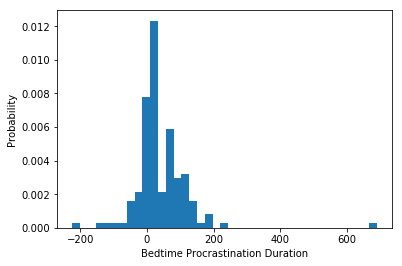

In [438]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bedtime_procrastination = missingval_return_without("", "procrastination_minutes", daily_data)
plt.hist(bedtime_procrastination, normed=True, bins="auto")
plt.xlabel('Bedtime Procrastination Duration');
plt.ylabel('Probability');

### Treat all negative procrastination values as zero procrastination

In [439]:
procrastination_minutes = select_column("procrastination_minutes", daily_data)

for i, each_duration in enumerate(procrastination_minutes):
    if each_duration < 0:
        procrastination_minutes[i] = 0
append_column(procrastination_minutes, "procrastination_minutes_positive", daily_data)
print_columns("procrastination_minutes_positive", daily_data)


procrastination_minutes_positive is: [nan, 45, 25, 90, 30, 120, 30, 30, 60, 60, 90, 0, 60, 0, nan, 45, 10, 15, 0, 105, 15, 60, 45, 30, 0, 120, 15, 15, 60, nan, 0, 0, 15, 60, 60, 75, 90, 15, 60, 30, 0, 30, 120, nan, 0, 0, 180, 90, 30, 30, 60, 0, 90, 90, 0, 30, 0, nan, 60, 120, 0, 120, 75, 60, 150, 180, 120, 105, 70, 0, 165, 240, 30, 120, 150, 60, 150, 135, nan, 5, 5, 0, 20, 0, 0, 60, 0, 0, 0, 15, 75, 90, 690, 0, 180, 15, 0, nan, 0, 30, 30, 15, 90, 0, 90, 15, 15, 150, 120, 30, 30, 90, 0, nan, 0, 15, 0, 0, 90, 50, 0, 30, 60, 0, 0, 15, 15, 30, 15, 60, 0, 30, nan, 30, 46, 120, 0, 75, 15, 0, 30, 45, 0, 30, 0, 0, 20, 120, 0, 15, nan, 60, 20, 0, 15, 15, 0, 60, 45, 0, 0, 15, 0, 15, 135, 0, 0, 0, 45]


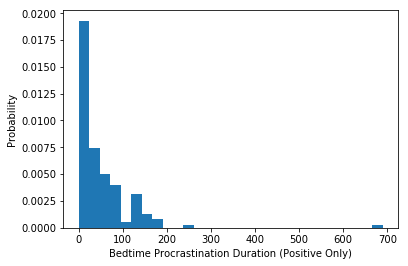

In [440]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bedtime_procrastination = missingval_return_without("", "procrastination_minutes_positive", daily_data)
plt.hist(bedtime_procrastination, normed=True, bins="auto")
plt.xlabel('Bedtime Procrastination Duration (Positive Only)');
plt.ylabel('Probability');

### Divide procrastination_minutes_positive to 15-minute bins

In [441]:
procrastination_minutes_positive = select_column("procrastination_minutes_positive", daily_data)

procrastination_minutes_positive_15by15 = []
for each_row in procrastination_minutes_positive:
    try:
        # Convert each value to a fold of 15, and by doing so, divide the column to groups 15 by 15.  
        procrastination_minutes_positive_15by15.append(int(each_row/15))
    except:
        procrastination_minutes_positive_15by15.append(float("NaN"))
    
append_column(procrastination_minutes_positive_15by15, "procrastination_minutes_positive_15by15", daily_data)
print_columns("procrastination_minutes_positive_15by15", daily_data)


procrastination_minutes_positive_15by15 is: [nan, 3, 1, 6, 2, 8, 2, 2, 4, 4, 6, 0, 4, 0, nan, 3, 0, 1, 0, 7, 1, 4, 3, 2, 0, 8, 1, 1, 4, nan, 0, 0, 1, 4, 4, 5, 6, 1, 4, 2, 0, 2, 8, nan, 0, 0, 12, 6, 2, 2, 4, 0, 6, 6, 0, 2, 0, nan, 4, 8, 0, 8, 5, 4, 10, 12, 8, 7, 4, 0, 11, 16, 2, 8, 10, 4, 10, 9, nan, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 1, 5, 6, 46, 0, 12, 1, 0, nan, 0, 2, 2, 1, 6, 0, 6, 1, 1, 10, 8, 2, 2, 6, 0, nan, 0, 1, 0, 0, 6, 3, 0, 2, 4, 0, 0, 1, 1, 2, 1, 4, 0, 2, nan, 2, 3, 8, 0, 5, 1, 0, 2, 3, 0, 2, 0, 0, 1, 8, 0, 1, nan, 4, 1, 0, 1, 1, 0, 4, 3, 0, 0, 1, 0, 1, 9, 0, 0, 0, 3]


### Divide procrastination_minutes_positive to four large bins

Bins:
- 0-15 
- 15-30
- 30-60
- 60+

In [442]:
column_summary("procrastination_minutes_positive_15by15", daily_data)

{nan: 1,
 0: 49,
 1: 25,
 2: 20,
 3: 8,
 4: 18,
 5: 4,
 6: 11,
 7: 2,
 8: 10,
 nan: 1,
 nan: 1,
 nan: 1,
 9: 2,
 10: 4,
 11: 1,
 12: 3,
 nan: 1,
 16: 1,
 nan: 1,
 46: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1}

In [443]:
procrastination_minutes_positive_15by15 = select_column("procrastination_minutes_positive_15by15", daily_data)
append_column(procrastination_minutes_positive_15by15, "procrastination_minutes_positive_four_bins", daily_data)

# IMPORTANT: This function worked for now, but it has a flaw: it owerwrites the vales it converted as it progresses, 
# if those values are once again referred to down in the line. Because the current data to be converted does not 
# have this characteristic, it works, but this should be fixed in future.
conversions_dictionary = {
    0:0, # 0 minutes (bin: 0-15)
    1:1, # 15 minutes (bin: 15-30)
    2:1, # 30 minutes (bin: 15-30)
    3:2, # 45 minutes (bin: 30-60)
    4:2, # 60 minutes (bin: 30-60)
    5:3, # 75 minutes (bin: 60+)
    6:3, # (bin: 60+)     # The rest of this list is populated ungracefully; a more dynamic method should be incorporated.
    7:3, # (bin: 60+)     # For this purpose, probably regex (e.g., transform_column_substring() function) should be used.
    8:3, # (bin: 60+)
    9:3, # (bin: 60+)
    10:3, # (bin: 60+)
    11:3, # (bin: 60+)
    12:3, # (bin: 60+)
    13:3, # (bin: 60+)
    14:3, # (bin: 60+)
    15:3, # (bin: 60+)
    16:3, # (bin: 60+)
    46:3 # (bin: 60+)
}

#transform column type to string here 
#transform substrings with regex
#transform_column_substring("0:0", "procrastination_minutes_positive_four_bins")
#transform column type back to integer # NaN types would probably be problematic

print_columns("procrastination_minutes_positive_15by15", daily_data)
print("")
transform_column_values(conversions_dictionary, "procrastination_minutes_positive_four_bins", daily_data)
print_columns("procrastination_minutes_positive_four_bins", daily_data)


procrastination_minutes_positive_15by15 is: [nan, 3, 1, 6, 2, 8, 2, 2, 4, 4, 6, 0, 4, 0, nan, 3, 0, 1, 0, 7, 1, 4, 3, 2, 0, 8, 1, 1, 4, nan, 0, 0, 1, 4, 4, 5, 6, 1, 4, 2, 0, 2, 8, nan, 0, 0, 12, 6, 2, 2, 4, 0, 6, 6, 0, 2, 0, nan, 4, 8, 0, 8, 5, 4, 10, 12, 8, 7, 4, 0, 11, 16, 2, 8, 10, 4, 10, 9, nan, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 1, 5, 6, 46, 0, 12, 1, 0, nan, 0, 2, 2, 1, 6, 0, 6, 1, 1, 10, 8, 2, 2, 6, 0, nan, 0, 1, 0, 0, 6, 3, 0, 2, 4, 0, 0, 1, 1, 2, 1, 4, 0, 2, nan, 2, 3, 8, 0, 5, 1, 0, 2, 3, 0, 2, 0, 0, 1, 8, 0, 1, nan, 4, 1, 0, 1, 1, 0, 4, 3, 0, 0, 1, 0, 1, 9, 0, 0, 0, 3]


procrastination_minutes_positive_four_bins is: [nan, 2, 1, 3, 1, 3, 1, 1, 2, 2, 3, 0, 2, 0, nan, 2, 0, 1, 0, 3, 1, 2, 2, 1, 0, 3, 1, 1, 2, nan, 0, 0, 1, 2, 2, 3, 3, 1, 2, 1, 0, 1, 3, nan, 0, 0, 3, 3, 1, 1, 2, 0, 3, 3, 0, 1, 0, nan, 2, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 0, 3, 3, 1, 3, 3, 2, 3, 3, nan, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 3, 3, 3, 0, 3, 1, 0, nan, 0, 1, 1, 1, 3, 0, 3, 1, 1, 3, 3, 1, 1, 3, 0, nan, 0, 1, 0, 

## Calculate Sleep Durations

In order to calculate sleep durations:
- Bed time must be calculated by finding the difference between bed and wake up times.
- Then, sleep transition time must be subtracted from bed time, in order to find actual sleep times. 

This is how sleep transition times look like now:

In [444]:
print_columns("sleep_transition", daily_data)


sleep_transition is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 3, 0, 2, 3, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 3, 2, 1, 0, 1, 1, 0, 3, 1, 3, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Sleep transition times should be converted to minutes:

In [445]:
from datetime import timedelta as td

# Select the sleep transitions column and store it in a new column, so it can be transformed afterwards 
# ... by using transform_column_values function.
sleep_transitions = select_column("sleep_transition", daily_data)
append_column(sleep_transitions, "sleep_transition_minutes_estimated", daily_data)

# Transform the values of column according to following scheme:
# 0: in 15 minutes
# 1: in half an hour
# 2: in an hour
# 3: in more than an hour
transform_column_values({0:td(minutes=15),1:td(minutes=30), 2:td(minutes=60), 3:td(minutes=90)}, "sleep_transition_minutes_estimated", daily_data)

# Print the new column for checking
print_columns("sleep_transition_minutes_estimated", daily_data[:][0:10])


sleep_transition_minutes_estimated is: [datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900), datetime.timedelta(0, 900)]


Now, the actual sleep time calculation can be made:

In [446]:
import datetime

# Assign relevant columns to variables
bed_times    = select_column("bed_time", daily_data)
wake_times   = select_column("wake_time", daily_data)
sleep_delays = select_column("sleep_transition_minutes_estimated", daily_data)

# Calculate times spent in bed
bed_durations = []
for each_wake_time, each_bed_time in zip(wake_times, bed_times):
    delta = each_wake_time - each_bed_time
    bed_durations.append(delta)

# Calculate times spent actually sleeping (and not just in bed) by subtracting sleep transition times from bed times
sleep_durations = []
for each_bed_duration, each_sleep_delay in zip(bed_durations, sleep_delays):
    actual_sleep_duration = each_bed_duration - each_sleep_delay
    sleep_durations.append(actual_sleep_duration)

# Transform sleep durations from datetime.timedelta object to minutes
sleep_minutes = []
for each_duration in sleep_durations:
    current_duration_in_minutes = each_duration.seconds/60
    sleep_minutes.append(current_duration_in_minutes)

# Add these new times as a column to data and print it for checking
append_column(sleep_minutes, "sleep_minutes", daily_data)
print_columns("sleep_minutes", daily_data)


sleep_minutes is: [435.0, 420.0, 410.0, 375.0, 525.0, 345.0, 435.0, 435.0, 435.0, 345.0, 435.0, 495.0, 405.0, 415.0, 515.0, 480.0, 545.0, 500.0, 510.0, 400.0, 525.0, 495.0, 460.0, 495.0, 505.0, 345.0, 515.0, 510.0, 465.0, 465.0, 555.0, 525.0, 480.0, 540.0, 405.0, 465.0, 375.0, 525.0, 405.0, 465.0, 585.0, 495.0, 390.0, 630.0, 640.0, 495.0, 465.0, 330.0, 435.0, 435.0, 510.0, 390.0, 360.0, 450.0, 510.0, 510.0, 435.0, 360.0, 360.0, 525.0, 525.0, 405.0, 205.0, 585.0, 415.0, 525.0, 135.0, 570.0, 140.0, 690.0, 450.0, 210.0, 585.0, 135.0, 135.0, 645.0, 435.0, 145.0, 555.0, 435.0, 450.0, 440.0, 530.0, 550.0, 625.0, 530.0, 555.0, 570.0, 455.0, 525.0, 420.0, 435.0, 1230.0, 550.0, 300.0, 540.0, 570.0, 390.0, 495.0, 390.0, 390.0, 375.0, 315.0, 480.0, 390.0, 495.0, 465.0, 405.0, 270.0, 380.0, 330.0, 390.0, 390.0, 500.0, 480.0, 480.0, 495.0, 540.0, 380.0, 400.0, 520.0, 435.0, 525.0, 420.0, 600.0, 450.0, 510.0, 480.0, 510.0, 540.0, 615.0, 435.0, 405.0, 390.0, 374.0, 480.0, 440.0, 540.0, 450.0, 450.0,

## [Canceled] Align 'Sun hours' variable

<font color=blue>CANCELED</font> <br>
Just like bed_time, sun_hours also reflects yesterday's values and it should be aligned with the current day.

In [575]:
#sun_hours_yesterday = select_column("sun_hours", daily_data)
#sun_hours_today = sun_hours_yesterday[1:len(sun_hours_yesterday)]
#sun_hours_today.append(0)

#append_column(sun_hours_today, "sun_hours_today", daily_data)

#print_columns(["sun_hours", "sun_hours_today"], daily_data)

## Create 1-,2-, and 3-day histories of variables

In [447]:
preview_data(daily_data,2)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 2 values per column.

questionnaire_timestamp: datetime.datetime(2017 4 10 9 57 26 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 11 23 25 39 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC'))
id: 'AB64' 'AB64'
bed_time: datetime.datetime(2017 4 10 2 0) datetime.datetime(2017 4 10 23 45)
late: 1 1
late_reason: 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling' ''
wake_time: datetime.datetime(2017 4 9 9 30) datetime.datetime(2017 4 10 7 0)
sleep_transition: 0 0
sleep_struggle: 0 0
night_wake: 0 4
wake_earlier: 0 0
wake_earlier_problem: 0 0
sleep_quality: 2 2
physical_activity: 1 1
mental_digital_activity: 1 1
social_activity: 2 2
light: 1 3
presleep_description: 'Theaterbezoek autorit (bijrijder)' 'Tv kijken'
temptation_smoking: 0 0
temptation_eating: 0 0
temptation_chat: 2 0
temptation_coffee: 0 0
temptation_social_media:

In [577]:
cumulative_history_variables = [
    ["procrastination_minutes", 4, "four"],
    ["procrastination_minutes", 3, "three"],
    ["procrastination_minutes", 2, "two"],
    
    ["sleep_minutes", 4, "four"],
    ["sleep_minutes", 3, "three"],
    ["sleep_minutes", 2, "two"],

    #["sleep_deficit", 4, "four"],
    #["sleep_deficit", 3, "three"],
    #["sleep_deficit", 2, "two"],    
    
    ["sleep_struggle", 4, "four"],
    ["sleep_struggle", 3, "three"],
    ["sleep_struggle", 2, "two"],
    
   ["night_wake", 4, "four"],
   ["night_wake", 3, "three"],
   ["night_wake", 2, "two"],
   
   
   ["sleep_quality", 4, "four"],
   ["sleep_quality", 3, "three"],
   ["sleep_quality", 2, "two"],
   
   ["social_activity", 4, "four"],
   ["social_activity", 3, "three"],
   ["social_activity", 2, "two"],
   
   ["light", 4, "four"],
   ["light", 3, "three"],
   ["light", 2, "two"],
   
   ["temptation_eating", 4, "four"],
   ["temptation_eating", 3, "three"],
   ["temptation_eating", 2, "two"],
   
   ["temptation_coffee", 4, "four"],
   ["temptation_coffee", 3, "three"],
   ["temptation_coffee", 2, "two"],
   
   ["temptation_score", 4, "four"],
   ["temptation_score", 3, "three"],
   ["temptation_score", 2, "two"]
]

for each_entity in cumulative_history_variables:
    new_column = history_cumulative(each_entity[0], each_entity[1], daily_data, "id")
    new_column_name = (each_entity[0] + "_" + each_entity[2] + "_day_cumulative_history")
    append_column(new_column, new_column_name, daily_data)


print_columns(["procrastination_minutes",
               "procrastination_minutes_two_day_cumulative_history",
              ], 
              daily_data)


procrastination_minutes is: [nan, 45, 25, 90, 30, 120, 30, 30, 60, 60, 90, -90, 60, -10, nan, 45, 10, 15, 0, 105, 15, 60, 45, 30, 0, 120, 15, 15, 60, nan, -120, -45, 15, 60, 60, 75, 90, 15, 60, 30, -150, 30, 120, nan, -225, -60, 180, 90, 30, 30, 60, 0, 90, 90, -30, 30, 0, nan, 60, 120, -15, 120, 75, 60, 150, 180, 120, 105, 70, 0, 165, 240, 30, 120, 150, 60, 150, 135, nan, 5, 5, -10, 20, -10, -10, 60, 0, -15, 0, 15, 75, 90, 690, -10, 180, 15, 0, nan, -60, 30, 30, 15, 90, 0, 90, 15, 15, 150, 120, 30, 30, 90, -30, nan, 0, 15, -15, -45, 90, 50, 0, 30, 60, 0, -75, 15, 15, 30, 15, 60, 0, 30, nan, 30, 46, 120, -60, 75, 15, 0, 30, 45, 0, 30, -60, 0, 20, 120, 0, 15, nan, 60, 20, -15, 15, 15, 0, 60, 45, 0, -15, 15, 0, 15, 135, 0, -15, 0, 45]

procrastination_minutes_two_day_cumulative_history is: [nan, nan, 70, 115, 120, 150, 150, 60, 90, 120, 150, 0, -30, 50, nan, nan, 55, 25, 15, 105, 120, 75, 105, 75, 30, 120, 135, 30, 75, nan, nan, -165, -30, 75, 120, 135, 165, 105, 75, 90, -120, -120, 150,

In [578]:
xdays_ago_variables = [
    ["procrastination_minutes", 3, "three"],
    ["procrastination_minutes", 2, "two"],
    ["procrastination_minutes", 1, "one"],
    ["temptation_score", 3, "three"],
    ["temptation_score", 2, "two"],
    ["temptation_score", 1, "one"],
    ["bed_time", 3, "three"],
    ["bed_time", 2, "two"],
    ["bed_time", 1, "one"],
    ["sleep_minutes", 3, "three"],
    ["sleep_minutes", 2, "two"],
    ["sleep_minutes", 1, "one"]
]

for each_entity in xdays_ago_variables:
    new_column      = history_nback(each_entity[0], each_entity[1], "column", daily_data, row_grouping_criteria_header="id")
    new_column_name = (each_entity[0] + "_" + each_entity[2] + "_days_ago") 
    append_column(new_column, new_column_name, daily_data)

    
print_columns(["temptation_score_one_days_ago",
               "temptation_score_two_days_ago",
               "temptation_score_three_days_ago",
              ],
              daily_data)
print("\nbed_time_three_days_ago:")
print_column_vertically("bed_time_three_days_ago", daily_data[:][0:20])


temptation_score_one_days_ago is: [nan, 6.0, 6.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 1.0, 4.0, 0.0, 4.0, nan, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 6.0, 2.0, 2.0, 6.0, 2.0, 6.0, 2.0, nan, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, nan, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 1.0, 4.0, 2.0, 1.0, 0.0, 2.0, nan, 6.0, 6.0, 6.0, 10.0, 6.0, 7.0, 10.0, 6.0, 6.0, 4.0, 6.0, 4.0, 4.0, 4.0, 2.0, 8.0, 8.0, 4.0, nan, 4.0, 2.0, 10.0, 3.0, 2.0, 4.0, 8.0, 4.0, 6.0, 6.0, 2.0, 2.0, 4.0, 0.0, 2.0, nan, 5.0, 2.0, 6.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 6.0, 4.0, 2.0, 4.0, 6.0, nan, 4.0, 4.0, 6.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 2.0, 4.0, 3.0, 7.0, 5.0, 6.0, 4.0, nan, 1.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0]

temptation_score_two_days_ago is: [nan, nan, 6.0, 6.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 1.0, 4.0, 0.0, nan, nan, 

## Calculate Sleep Deficit

### Calculate sleep deficit change for the current row

In [579]:
sleep_minutes = select_column("sleep_minutes", daily_data)

sleep_deficit_changes = []
for each_sleep_duration in sleep_minutes:
    current_deficit = 480 - each_sleep_duration
    sleep_deficit_changes.append(current_deficit)

append_column(sleep_deficit_changes, "sleep_deficit_change", daily_data)    
print_columns("sleep_deficit_change", daily_data)


sleep_deficit_change is: [45.0, 60.0, 70.0, 105.0, -45.0, 135.0, 45.0, 45.0, 45.0, 135.0, 45.0, -15.0, 75.0, 65.0, -35.0, 0.0, -65.0, -20.0, -30.0, 80.0, -45.0, -15.0, 20.0, -15.0, -25.0, 135.0, -35.0, -30.0, 15.0, 15.0, -75.0, -45.0, 0.0, -60.0, 75.0, 15.0, 105.0, -45.0, 75.0, 15.0, -105.0, -15.0, 90.0, -150.0, -160.0, -15.0, 15.0, 150.0, 45.0, 45.0, -30.0, 90.0, 120.0, 30.0, -30.0, -30.0, 45.0, 120.0, 120.0, -45.0, -45.0, 75.0, 275.0, -105.0, 65.0, -45.0, 345.0, -90.0, 340.0, -210.0, 30.0, 270.0, -105.0, 345.0, 345.0, -165.0, 45.0, 335.0, -75.0, 45.0, 30.0, 40.0, -50.0, -70.0, -145.0, -50.0, -75.0, -90.0, 25.0, -45.0, 60.0, 45.0, -750.0, -70.0, 180.0, -60.0, -90.0, 90.0, -15.0, 90.0, 90.0, 105.0, 165.0, 0.0, 90.0, -15.0, 15.0, 75.0, 210.0, 100.0, 150.0, 90.0, 90.0, -20.0, 0.0, 0.0, -15.0, -60.0, 100.0, 80.0, -40.0, 45.0, -45.0, 60.0, -120.0, 30.0, -30.0, 0.0, -30.0, -60.0, -135.0, 45.0, 75.0, 90.0, 106.0, 0.0, 40.0, -60.0, 30.0, 30.0, 60.0, 120.0, 10.0, -660.0, -90.0, 30.0, 15.0, -1

### Calculate cumulative sleep deficit (simple)

In [580]:
sleep_deficit_changes = select_column("sleep_deficit_change", daily_data)
sleep_deficits = history_cumulative("sleep_deficit_change", 4, daily_data, "id", zero_floored_summation=1)
append_column(sleep_deficits, "sleep_deficit_minutes_simple", daily_data)

print_columns("sleep_deficit_change", daily_data)
print_columns("sleep_deficit_minutes_simple", daily_data)


sleep_deficit_change is: [45.0, 60.0, 70.0, 105.0, -45.0, 135.0, 45.0, 45.0, 45.0, 135.0, 45.0, -15.0, 75.0, 65.0, -35.0, 0.0, -65.0, -20.0, -30.0, 80.0, -45.0, -15.0, 20.0, -15.0, -25.0, 135.0, -35.0, -30.0, 15.0, 15.0, -75.0, -45.0, 0.0, -60.0, 75.0, 15.0, 105.0, -45.0, 75.0, 15.0, -105.0, -15.0, 90.0, -150.0, -160.0, -15.0, 15.0, 150.0, 45.0, 45.0, -30.0, 90.0, 120.0, 30.0, -30.0, -30.0, 45.0, 120.0, 120.0, -45.0, -45.0, 75.0, 275.0, -105.0, 65.0, -45.0, 345.0, -90.0, 340.0, -210.0, 30.0, 270.0, -105.0, 345.0, 345.0, -165.0, 45.0, 335.0, -75.0, 45.0, 30.0, 40.0, -50.0, -70.0, -145.0, -50.0, -75.0, -90.0, 25.0, -45.0, 60.0, 45.0, -750.0, -70.0, 180.0, -60.0, -90.0, 90.0, -15.0, 90.0, 90.0, 105.0, 165.0, 0.0, 90.0, -15.0, 15.0, 75.0, 210.0, 100.0, 150.0, 90.0, 90.0, -20.0, 0.0, 0.0, -15.0, -60.0, 100.0, 80.0, -40.0, 45.0, -45.0, 60.0, -120.0, 30.0, -30.0, 0.0, -30.0, -60.0, -135.0, 45.0, 75.0, 90.0, 106.0, 0.0, 40.0, -60.0, 30.0, 30.0, 60.0, 120.0, 10.0, -660.0, -90.0, 30.0, 15.0, -1

### Calculate Three-day Weighted Cumulative History (Special formula on p.13 of Erik van den Boogaard's thesis)
***Former name of variable: 'Cumulative Sleep Deficit'***

This is calculated as follows: <br>
CBT = BTP-0 + (BTP-1)*0.5 + (BTP-2)*0.2

In [581]:
procrastination_minutes_current_day  = select_column("procrastination_minutes", daily_data)
procrastination_minutes_one_days_ago = select_column("procrastination_minutes_one_days_ago", daily_data)
procrastination_minutes_two_days_ago = select_column("procrastination_minutes_two_days_ago", daily_data)

procrastination_minutes_three_day_weighted_cumulative_history = []
for each_row_current_day, each_row_one_days_ago, each_row_two_days_ago in zip(procrastination_minutes_current_day, procrastination_minutes_one_days_ago, procrastination_minutes_two_days_ago):
    procrastination_minutes_three_day_weighted_cumulative_history.append(each_row_current_day + each_row_one_days_ago*0.5 + each_row_two_days_ago*0.2)

procrastination_minutes_three_day_weighted_cumulative_history_positive_only =  []
current_value = 0
for i, each_row in enumerate(procrastination_minutes_three_day_weighted_cumulative_history):
    if each_row == each_row: # If the value is not NaN
        if each_row >= 0:    # Keep all values as they are if they are positive
            current_value = each_row
        elif each_row < 0:   # Make all values 0 if they are negative (as negative procrastination is not possible in this study)
            current_value = 0
    else:                   # If value is NaN
        current_value = each_row

    procrastination_minutes_three_day_weighted_cumulative_history_positive_only.append(current_value)
    
append_column(procrastination_minutes_three_day_weighted_cumulative_history_positive_only, "procrastination_minutes_three_day_weighted_cumulative_history", daily_data)
print_columns(["procrastination_minutes", "procrastination_minutes_one_days_ago", "procrastination_minutes_two_days_ago", "procrastination_minutes_three_day_weighted_cumulative_history"], daily_data)


procrastination_minutes is: [nan, 45, 25, 90, 30, 120, 30, 30, 60, 60, 90, -90, 60, -10, nan, 45, 10, 15, 0, 105, 15, 60, 45, 30, 0, 120, 15, 15, 60, nan, -120, -45, 15, 60, 60, 75, 90, 15, 60, 30, -150, 30, 120, nan, -225, -60, 180, 90, 30, 30, 60, 0, 90, 90, -30, 30, 0, nan, 60, 120, -15, 120, 75, 60, 150, 180, 120, 105, 70, 0, 165, 240, 30, 120, 150, 60, 150, 135, nan, 5, 5, -10, 20, -10, -10, 60, 0, -15, 0, 15, 75, 90, 690, -10, 180, 15, 0, nan, -60, 30, 30, 15, 90, 0, 90, 15, 15, 150, 120, 30, 30, 90, -30, nan, 0, 15, -15, -45, 90, 50, 0, 30, 60, 0, -75, 15, 15, 30, 15, 60, 0, 30, nan, 30, 46, 120, -60, 75, 15, 0, 30, 45, 0, 30, -60, 0, 20, 120, 0, 15, nan, 60, 20, -15, 15, 15, 0, 60, 45, 0, -15, 15, 0, 15, 135, 0, -15, 0, 45]

procrastination_minutes_one_days_ago is: [nan, nan, 45, 25, 90, 30, 120, 30, 30, 60, 60, 90, -90, 60, nan, nan, 45, 10, 15, 0, 105, 15, 60, 45, 30, 0, 120, 15, 15, nan, nan, -120, -45, 15, 60, 60, 75, 90, 15, 60, 30, -150, 30, nan, nan, -225, -60, 180, 90,

## Convert all integers to float (So that all values in the dataset would be compatible with NaN values)

In [582]:
headers_list = daily_data[0]

for each_header in headers_list:
    selected_column = select_column(each_header, daily_data)
    for i, each_row in enumerate(selected_column):
        if type(each_row) is int:
            selected_column[i] = float(each_row)
    replace_column(selected_column, each_header, daily_data)

# Data after parsing

In [583]:
preview_data(daily_data,3)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 3 values per column.

questionnaire_timestamp: datetime.datetime(2017 4 10 9 57 26 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 11 23 25 39 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 12 7 42 47 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC'))
id: 'AB64' 'AB64' 'AB64'
bed_time: datetime.datetime(2017 4 10 2 0) datetime.datetime(2017 4 10 23 45) datetime.datetime(2017 4 11 23 55)
late: 1.0 1.0 1.0
late_reason: 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling' '' 'Man kwam thuis en daar wilde ik nog even mee praten'
wake_time: datetime.datetime(2017 4 9 9 30) datetime.datetime(2017 4 10 7 0) datetime.datetime(2017 4 11 7 0)
sleep_transition: 0.0 0.0 0.0
sleep_struggle: 0.0 0.0 0.0
night_wake: 0.0 4.0 2.0
wake_earlier: 0.0 0.0 0.0
wake_earlier_problem: 0.0 0.0 0.0
sleep_quality: 

# Make a class from the dataset to enable easy access to variables  

<font color=blue>Canceled</font> <br>
This is intended to enable easy manipulation of the data. 

In [584]:
# class Daily ():
#     def __init__(self):
#         self.date                      = select_column("date", daily_data)
#         self.id                        = select_column("id", daily_data)
#         self.bed_time                  = select_column("bed_time", daily_data)
#         self.late                      = select_column("late", daily_data)
#         self.late_reason               = select_column("late_reason", daily_data)
#         self.wake_time                 = select_column("wake_time", daily_data)
#         self.sleep_transition          = select_column("sleep_transition", daily_data)
#         self.sleep_struggle            = select_column("sleep_struggle", daily_data)
#         self.night_wake                = select_column("night_wake", daily_data)
#         self.wake_earlier              = select_column("wake_earlier", daily_data)
#         self.wake_earlier_problem      = select_column("wake_earlier_problem", daily_data)
#         self.sleep_quality             = select_column("sleep_quality", daily_data)
#         self.physical_activity         = select_column("physical_activity", daily_data)
#         self.mental_digital_activity   = select_column("mental_digital_activity", daily_data)
#         self.social_activity           = select_column("social_activity", daily_data)
#         self.light                     = select_column("light", daily_data)
#         self.presleep_description      = select_column("presleep_description", daily_data)
#         self.temptation_smoking        = select_column("temptation_smoking", daily_data)
#         self.temptation_eating         = select_column("temptation_eating", daily_data)
#         self.temptation_chat           = select_column("temptation_chat", daily_data)
#         self.temptation_coffee         = select_column("temptation_coffee", daily_data)
#         self.temptation_social_media   = select_column("temptation_social_media", daily_data)
#         self.temptation_internet       = select_column("temptation_internet", daily_data)
#         self.temptation_tv             = select_column("temptation_tv", daily_data)
#         self.temptation_alcohol        = select_column("temptation_alcohol", daily_data)
#         self.temptation_soft_drink     = select_column("temptation_soft_drink", daily_data)
#         self.temptation_cleaning       = select_column("temptation_cleaning", daily_data)
#         self.temptation_shopping       = select_column("temptation_shopping", daily_data)
#         self.temptation_other          = select_column("temptation_other", daily_data)
#         self.temptation_score          = select_column("temptation_score", daily_data)
#         self.procrastination_minutes   = select_column("procrastination_minutes", daily_data),
#         self.bed_time_plan             = select_column("bed_time_plan", daily_data)
#
# daily = Daily()

Example uses:

In [585]:
# print (daily.sleep_quality)
# print (daily.light[0:11])

In [586]:
# print(daily.bed_time_plan[0])
# print(daily.bed_time_plan[0].hour)

<a name="fitbit-data"></a>
# FITBIT DATA

Import data, tokenize it, and read it to a variable:

In [587]:
import csv
fitbit_data = list(csv.reader(open("data//original_data//fitbit-data.csv", encoding="utf8")))

print(fitbit_data[0])                           # The first row is not a headers row.
fitbit_data = fitbit_data[1:len(fitbit_data)]   # It is now a headers row.
print(fitbit_data[0])

['\ufeffActivities', '', '', '', '', '', '', '', '', '']
['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories']


In [588]:
print(fitbit_data[0:3]) # <-- Print row 2 and 3 of daily dataset.

[['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', 'Activity Calories'], ['01/02/2017', '1.716', '0', '0', '0', '1.44', '0', '0', '0', '0'], ['02/02/2017', '1.716', '0', '0', '0', '1.44', '0', '0', '0', '0']]


In [589]:
headers_list = [
    "date", "calories_burned", "steps", "distance", "floors", 
    "minutes_sedentary", "minutes_lightly_active", "minutes_fairly_active", "minutes_very_active", 
    "activity_calories"
]

replace_headers(headers_list, fitbit_data)

print(fitbit_data[0:2])

[['date', 'calories_burned', 'steps', 'distance', 'floors', 'minutes_sedentary', 'minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active', 'activity_calories'], ['01/02/2017', '1.716', '0', '0', '0', '1.44', '0', '0', '0', '0']]


In [590]:
preview_data(fitbit_data,8)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 8 values per column.

date: '01/02/2017' '02/02/2017' '03/02/2017' '04/02/2017' '05/02/2017' '06/02/2017' '07/02/2017' '08/02/2017'
calories_burned: '1.716' '1.716' '1.716' '1.716' '1.716' '1.716' '1.716' '1.716'
steps: '0' '0' '0' '0' '0' '0' '0' '0'
distance: '0' '0' '0' '0' '0' '0' '0' '0'
floors: '0' '0' '0' '0' '0' '0' '0' '0'
minutes_sedentary: '1.44' '1.44' '1.44' '1.44' '1.44' '1.44' '1.44' '1.44'
minutes_lightly_active: '0' '0' '0' '0' '0' '0' '0' '0'
minutes_fairly_active: '0' '0' '0' '0' '0' '0' '0' '0'
minutes_very_active: '0' '0' '0' '0' '0' '0' '0' '0'
activity_calories: '0' '0' '0' '0' '0' '0' '0' '0'


# Value Transformations

## Date

In [591]:
import datetime

datetime.datetime

datetime.datetime

Print the "date" column:

In [592]:
print_column_vertically("date", fitbit_data[0:5][0:5])
print(type(select_column("date", fitbit_data)[0])) # print the type of a date value.

01/02/2017
02/02/2017
03/02/2017
04/02/2017
<class 'str'>


In [593]:
# NOTE: This function can only be ran once. Once the new values are in the memory, using them as an input will cause an error.
# Please re-reun all the previous cells from "Menu -> Cell -> Run all above to reset the value of the input variable.

import datetime

date_column = select_column("date", fitbit_data)

for i, date in enumerate(date_column): 
    date_column[i] = datetime.datetime.strptime(date_column[i], "%d/%m/%Y")    

replace_column(date_column, "date", fitbit_data)
print_column_vertically("date", fitbit_data[0:5][0:5])

print("\n Type of time is now:")
print(type(select_column("date", fitbit_data)[0]))

2017-02-01 00:00:00
2017-02-02 00:00:00
2017-02-03 00:00:00
2017-02-04 00:00:00

 Type of time is now:
<class 'datetime.datetime'>


The "date" column is now parsed/converted into a datetime object from a string. 

Datetime objecs can be used in the following manner:

In [594]:
date_column[0].day

1

## Conversion of Values from Strings to Integers and Floats

Here is a preview of the data in its current form.

In [595]:
preview_data(fitbit_data)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 29 values per column.

date: datetime.datetime(2017 2 1 0 0) datetime.datetime(2017 2 2 0 0) datetime.datetime(2017 2 3 0 0) datetime.datetime(2017 2 4 0 0) datetime.datetime(2017 2 5 0 0) datetime.datetime(2017 2 6 0 0) datetime.datetime(2017 2 7 0 0) datetime.datetime(2017 2 8 0 0) datetime.datetime(2017 2 9 0 0) datetime.datetime(2017 2 10 0 0) datetime.datetime(2017 2 11 0 0) datetime.datetime(2017 2 12 0 0) datetime.datetime(2017 2 13 0 0) datetime.datetime(2017 2 14 0 0) datetime.datetime(2017 2 15 0 0) datetime.datetime(2017 2 16 0 0) datetime.datetime(2017 2 17 0 0) datetime.datetime(2017 2 18 0 0) datetime.datetime(2017 2 19 0 0) datetime.datetime(2017 2 20 0 0) datetime.datetime(2017 2 21 0 0) datetime.datetime(2017 2 22 0 0) datetime.datetime(2017 2 23 0 0) datetime.datetime(2017 2 24 0 0) datetime.datetime(2017 2 25 0 0) datetime.datetime(2017 2 26 0 0) datetime.datetime(2017 2 27 0 0) datetime.d

- In the data above, some values don't make sense, such as '1.716' as calories_burned 1.7 is too small for a calory burn record, and it is likely to be 1716.
- This is also the case for minutes sedentary: 144 instead of 1.44.
- This likely means that dots are placed to help reading, but not as decimal indicators. Therefore, dots should be removed:

In [596]:
dot_removal_columns = [
    "calories_burned", "steps", "distance", "floors",
    "minutes_sedentary", "minutes_lightly_active", "minutes_fairly_active", "minutes_very_active", 
    "activity_calories"
]

transform_column_substring("\.", "", dot_removal_columns, fitbit_data)
print_columns(dot_removal_columns, fitbit_data)


calories_burned is: ['1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '1716', '2743', '2406', '208', '2062', '352', '2348', '2366', '2524', '2194', '2529', '2595', '1732', '1716', '1716']

steps is: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '17507', '9291', '325', '325', '19386', '7243', '8618', '10702', '5564', '10293', '11591', '30', '0', '0']

distance is: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '826', '438', '153', '153', '959', '342', '406', '505', '262', '485', '547', '001', '0', '0']

floors is: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '20', '7', '0', '32', '52', '34', '15', '8', '40', '35', '54', '0', '0', '0']

minutes_sedentary is: ['144', '144', '144', '144', '144', '144', '144', '144', '144', '144', '144', '144', '144', '1409', '507', '1212', '612', '990', '984', '790', '757', '1199', '1251', '1157', '111', '1434', '144', '144']



Now that the dots are out of the way, values can be converted from strings to integers and floats:

In [597]:
integer_columns = [
    "steps", "floors",
    "minutes_sedentary", "minutes_lightly_active", "minutes_fairly_active", "minutes_very_active",
    "distance", "calories_burned", "activity_calories"
    ]

transform_column_type(integer_columns, "int", fitbit_data) # Transform all strings in these columns to integers
preview_data(fitbit_data, 8)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 8 values per column.

date: datetime.datetime(2017 2 1 0 0) datetime.datetime(2017 2 2 0 0) datetime.datetime(2017 2 3 0 0) datetime.datetime(2017 2 4 0 0) datetime.datetime(2017 2 5 0 0) datetime.datetime(2017 2 6 0 0) datetime.datetime(2017 2 7 0 0) datetime.datetime(2017 2 8 0 0)
calories_burned: 1716 1716 1716 1716 1716 1716 1716 1716
steps: 0 0 0 0 0 0 0 0
distance: 0 0 0 0 0 0 0 0
floors: 0 0 0 0 0 0 0 0
minutes_sedentary: 144 144 144 144 144 144 144 144
minutes_lightly_active: 0 0 0 0 0 0 0 0
minutes_fairly_active: 0 0 0 0 0 0 0 0
minutes_very_active: 0 0 0 0 0 0 0 0
activity_calories: 0 0 0 0 0 0 0 0


# Data after parsing

In [598]:
preview_data(fitbit_data,3)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 3 values per column.

date: datetime.datetime(2017 2 1 0 0) datetime.datetime(2017 2 2 0 0) datetime.datetime(2017 2 3 0 0)
calories_burned: 1716 1716 1716
steps: 0 0 0
distance: 0 0 0
floors: 0 0 0
minutes_sedentary: 144 144 144
minutes_lightly_active: 0 0 0
minutes_fairly_active: 0 0 0
minutes_very_active: 0 0 0
activity_calories: 0 0 0


# Make a class from the dataset to enable easy access to variables  

This is intended to enable easy manipulation of the data. 

In [599]:
# class Fitbit ():
#     def __init__(self):
#         self.date                     = select_column("date", fitbit_data)
#         self.calories_burned          = select_column("calories_burned", fitbit_data)
#         self.steps                    = select_column("steps", fitbit_data)
#         self.distance                 = select_column("distance", fitbit_data)
#         self.floors                   = select_column("floors", fitbit_data)
#         self.minutes_sedentary        = select_column("minutes_sedentary", fitbit_data)
#         self.minutes_lightly_active   = select_column("minutes_lightly_active", fitbit_data)
#         self.minutes_fairly_active    = select_column("minutes_fairly_active", fitbit_data)
#         self.minutes_very_active      = select_column("minutes_very_active", fitbit_data)
#         self.activity_calories        = select_column("activity_calories", fitbit_data)        
# fitbit = Fitbit()

Example uses:

In [600]:
# print (fitbit.distance)

In [601]:
# print (fitbit.date[11])
# print (fitbit.date[11].day)

In [602]:
# print(fitbit.minutes_fairly_active[0:5])

<a name="final-steps"></a>
# IV. Final Steps

## Write the prepared datasets to CSV files 

In [603]:
import csv

### Intake data

Write intake_data to .csv:

In [333]:
file = open('data//intake_prepared_v1.2.csv', 'w', newline='')
writer = csv.writer(file, delimiter=';', quoting=csv.QUOTE_NONNUMERIC)
for row in intake_data:
    writer.writerow(row)
file.close()

Check if the written dataset is the same with the one in the memory:

In [334]:
import csv
test_intake = list(csv.reader(open("data//intake_prepared_v1.2.csv", encoding="utf8"), delimiter=";"))

print(len(intake_data) == len(test_intake))
print(select_column("id", intake_data) == select_column("id", test_intake))

True
True


### Daily data

Write daily_data to .csv:

In [604]:
output_file = "data//daily_prepared_vJ.csv"

In [605]:
file = open(output_file, 'w', newline='')
writer = csv.writer(file, delimiter=';', quoting=csv.QUOTE_NONNUMERIC)
for row in daily_data:
    writer.writerow(row)
file.close()

Check if the written dataset is the same with the one in the memory:

In [606]:
import csv
test_daily = list(csv.reader(open(output_file, encoding="utf8"), delimiter=";"))

print(len(daily_data) == len(test_daily))
print(select_column("id", daily_data) == select_column("id", test_daily))

True
True


In [342]:
preview_data(daily_data, 4)

Transposed Table (Columns in original data => Rows in output)
Displaying up to 4 values per column.

questionnaire_timestamp: datetime.datetime(2017 4 10 9 57 26 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 11 23 25 39 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 12 7 42 47 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC')) datetime.datetime(2017 4 13 8 26 21 tzinfo=datetime.timezone(datetime.timedelta(0 7200) 'UTC'))
id: 'AB64' 'AB64' 'AB64' 'AB64'
bed_time: datetime.datetime(2017 4 10 2 0) datetime.datetime(2017 4 10 23 45) datetime.datetime(2017 4 11 23 55) datetime.datetime(2017 4 13 0 30)
late: 1.0 1.0 1.0 1.0
late_reason: 'We zijn vanuit het noorden van het land teruggereden naar huis na een theatervoorstelling' '' 'Man kwam thuis en daar wilde ik nog even mee praten' 'Tot laat doorgewerkt.'
wake_time: datetime.datetime(2017 4 9 9 30) datetime.datetime(2017 4 10 7 0) datetime.datetime(2017 4 

In [339]:
print_column_vertically("bed_time_three_days_ago", daily_data)

nan
nan
nan
2017-04-10 02:00:00
2017-04-10 23:45:00
2017-04-11 23:55:00
2017-04-13 00:30:00
2017-04-14 00:00:00
2017-04-15 01:00:00
2017-04-15 23:30:00
2017-04-16 23:30:00
2017-04-18 00:30:00
2017-04-19 01:00:00
2017-04-20 00:30:00
nan
nan
nan
2017-04-09 21:30:00
2017-04-10 22:15:00
2017-04-11 21:40:00
2017-04-12 21:15:00
2017-04-13 22:00:00
2017-04-14 23:15:00
2017-04-15 21:15:00
2017-04-16 22:00:00
2017-04-17 22:15:00
2017-04-18 22:00:00
2017-04-19 21:30:00
2017-04-21 01:00:00
nan
nan
nan
2017-04-09 23:15:00
2017-04-10 22:00:00
2017-04-11 22:15:00
2017-04-12 22:15:00
2017-04-14 00:00:00
2017-04-15 00:00:00
2017-04-16 00:15:00
2017-04-17 01:30:00
2017-04-17 23:15:00
2017-04-19 00:00:00
2017-04-20 00:00:00
nan
nan
nan
2017-04-10 03:00:00
2017-04-11 01:15:00
2017-04-12 02:30:00
2017-04-13 05:00:00
2017-04-14 04:30:00
2017-04-15 03:30:00
2017-04-16 03:30:00
2017-04-17 04:00:00
2017-04-18 01:00:00
2017-04-19 04:30:00
2017-04-20 04:30:00
nan
nan
nan
2017-04-10 03:00:00
2017-04-11 03:00:00


## Turn data to array

<font color=red>ON HOLD</font>
- May not be necessary if we are to work on Orange
- Including additional data types in a numpy array may turn out to be a challenge.

## Merge intake and daily datasets

<font color=red>ON HOLD</font>
- If intake and daily datasets are merged:
    - There will either be many columns with the same name
    - Or there will be many rows with the same values

In [170]:
len(daily_data), len(intake_data)

(170, 12)

In [470]:
a = [1,2,3]
b = [1,3]
b.insert(4,"b")

try:
    b[10]
except IndexError:
    print("y")

y
